In [19]:
import pandas as pd #Using pandas to read csv data

from matplotlib import pyplot as plt #for ploting

import numpy as np

from scipy.fft import fft, ifft

from scipy import signal

In [20]:
dataframe = pd.read_csv('./2019_fixed/H1.csv', delimiter=',', low_memory=False) #dataframe has type pandas.core.frame.dataframeFrame

In [21]:
offsetRow = 5
timestampPerDay = 96
numberOfDays=int((dataframe.shape[0]-offsetRow)/timestampPerDay)
t = range(0,96) #for time axes 

window = signal.windows.blackman(8)
#window = signal.windows.tukey(8)

def average(lst):
    return sum(lst) / len(lst)

def convertCommaDot(s):
    return float(s.replace(',','.'))

def get_data_from_table(day,offset,timestampPerDay,columnNr,dataframe):
    data = dataframe.iloc[offsetRow+day*timestampPerDay:(timestampPerDay+offsetRow)+day*timestampPerDay,columnNr] #Data type = pandas.Series of string
    data = list(map(convertCommaDot, data))
    return data

def plot_figure(data):
    window_data = np.multiply(data,window)
    #print(average(window_data))
    fig = plt.figure()
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
    #ax.set_xlim([xmin, xmax])
    ax.set_ylim([0, 1000])
    plt.plot(data)
    plt.show()
    
def plot_fft(data):
    data = np.multiply(data,window)
    #dataNP = np.asarray(data)
    dataFT = fft(data,32)
    dataFT = list(map(abs, dataFT))
    #print(average(dataFT[3:16]))
    fig = plt.figure()
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
    #ax.set_xlim([xmin, xmax])
    ax.set_ylim([-300, 400])
    plt.plot(dataFT)
    plt.show()
    
def average_data(data):
    window_data = np.multiply(data,window)
    return average(window_data)

def average_four(data):
    data = np.multiply(data,window)
    dataFT = fft(data,32)
    dataFT = list(map(abs, dataFT))
    return average(dataFT[3:16])

In [13]:
list_data = []
list_four = []
for day in range(0,numberOfDays):
    plt.clf()
    date = dataframe.iloc[offsetRow+day*timestampPerDay,6]
    #print(day, date)
    #for columnNumber in range(17,19):  
    columnNumber = 18
    data = get_data_from_table(day,offsetRow,timestampPerDay,columnNumber,dataframe)
    
    for time in range(8,20):
        time_data = data[time*4:time*4 + 8] #get data in 2 hours
        #plot_figure(time_data)
        #plot_fft(time_data)
        
        list_data.append(add_data(time_data))
        list_four.append(add_four(time_data))
        #x = input()
        
        
        
    

<Figure size 432x288 with 0 Axes>

In [14]:
print(len(list_data), len(list_four))

4380 4380


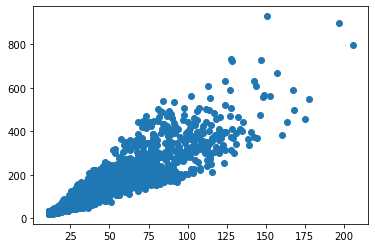

In [15]:
plt.scatter(list_data, list_four)
plt.show()

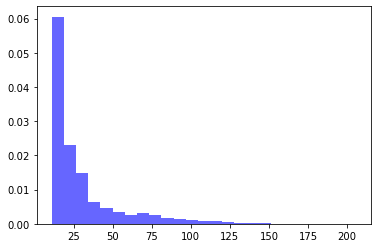

In [16]:
ar = np.asarray(list_data)   
plt.hist(ar,bins=25, density=True, alpha=0.6, color='b')
plt.show()

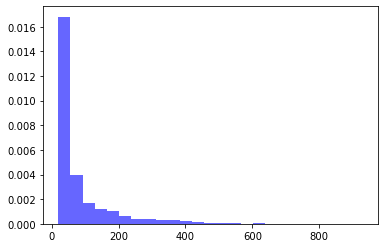

In [17]:
ar = np.asarray(list_four)   
plt.hist(ar,bins=25, density=True, alpha=0.6, color='b')
plt.show()

In [22]:
dataframe = pd.read_csv('./not_GMT.csv', delimiter=',', low_memory=False) #dataframe has type pandas.core.frame.dataframeFrame

In [25]:
totalLine = dataframe.shape[0]
timestampPerDay = 96
offsetCol = 4

def get_data_from_table_1(line, offsetCol, timestampPerDay, dataframe):
    data = dataframe.iloc[line, offsetCol:(offsetCol + timestampPerDay)]
    data = list(data)
    return data

def plot_full_figure(dataList):
    fig = plt.figure()
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
    ax.plot(t, dataList)
    ax.set_xlabel('Time')
    #ax.set_title(columnDict[columnNumber])
    #yAx=list(range(0,11))
    #ax.set_yticks([maxValue/10*x for x in yAx])
    plt.ylim(0, 1.05 * 1000)
    ax.set_xticks([0,11,23,35,47,59,71,83,95])
    ax.set_xticklabels(['00:00','03:00','06:00','09:00','12:00','15:00','18:00','21:00','23:45'])
    plt.show()

t = range(0,96) #for time axes 

window = signal.windows.tukey(8)
#why using tukey window: giu nguyen khoang thoi gian chinh can phan tich
#to test later
#window = np.array([0.3 , 0.61126047, 1., 1., 1., 1.,  0.61126047, 0.3])
def average(lst):
    return sum(lst) / len(lst)
def plot_figure(data):
    #window_data = np.multiply(data,window)
    #print(average(window_data))
    fig = plt.figure()
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
    #ax.set_xlim([xmin, xmax])
    ax.set_ylim([0, 1000])
    plt.plot(data)
    plt.show()
    
def plot_fft(data):
    data = np.multiply(data,window)
    #dataNP = np.asarray(data)
    dataFT = fft(data,32)
    dataFT = list(map(abs, dataFT))
    #print(average(dataFT[3:16]))
    fig = plt.figure()
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
    #ax.set_xlim([xmin, xmax])
    ax.set_ylim([-300, 400])
    plt.plot(dataFT)
    plt.show()
    
def average_data(data):
    window_data = np.multiply(data,window)
    return average(window_data)

def average_four(data):
    data = np.multiply(data,window)
    dataFT = fft(data,32)
    dataFT = list(map(abs, dataFT))
    return average(dataFT[3:16]), max(dataFT)

In [26]:
print(signal.windows.tukey(8))

[0.         0.61126047 1.         1.         1.         1.
 0.61126047 0.        ]


0: not at home

1: at home

0.5: need to be clarify
    
     1. constantly more than not at home: -> at home and using low energy
                                             
                                          -> not at home but something run in background
     
     2. at home and left ( look like this \ ) or not at home and come back (/)
     
     3. small spike in the middle

<Figure size 432x288 with 0 Axes>

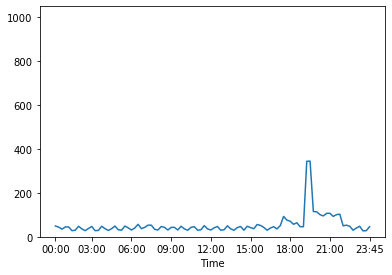

Mo 21.01.19 hour 9


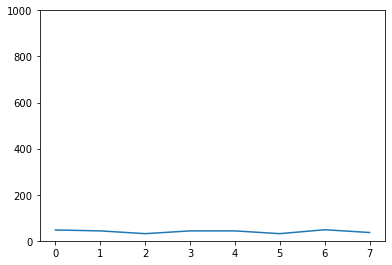

data:  240
average data value:  25.453087811876543


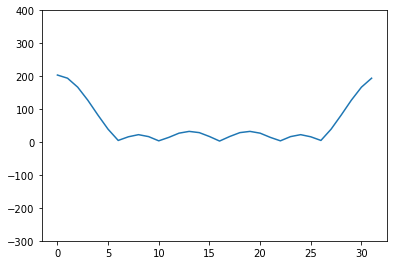

average fourier value:  33.145652674500006 max_four:  203.62470249501234
Mo 21.01.19 hour 10


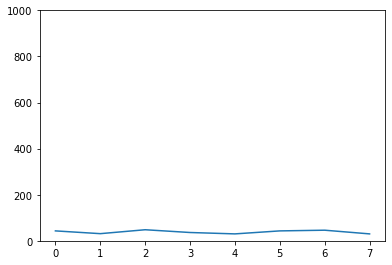

data:  241
average data value:  25.508381994664763


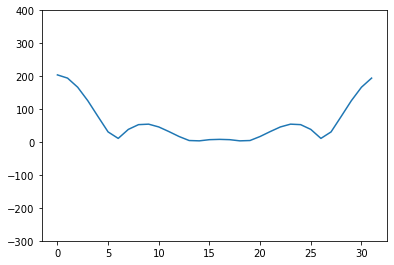

average fourier value:  38.5645542087367 max_four:  204.06705595731813
Mo 21.01.19 hour 11


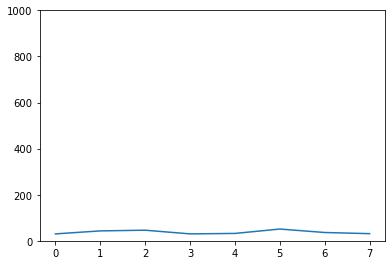

data:  242
average data value:  25.911197111409304


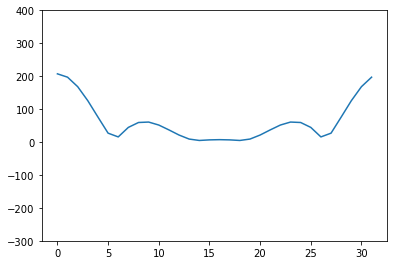

average fourier value:  41.500383791270835 max_four:  207.2895768912744
Mo 21.01.19 hour 12


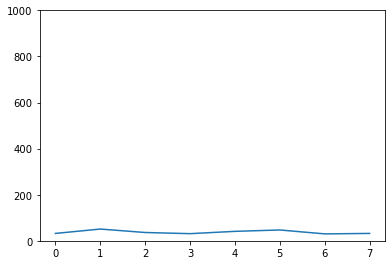

data:  243
average data value:  25.564012228153842


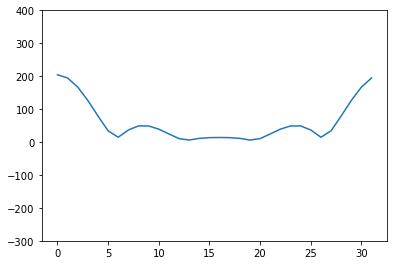

average fourier value:  38.03227180200504 max_four:  204.51209782523074
Mo 21.01.19 hour 13


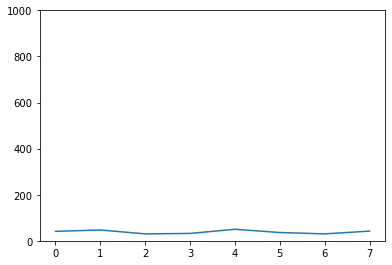

data:  244
average data value:  24.383381994664763


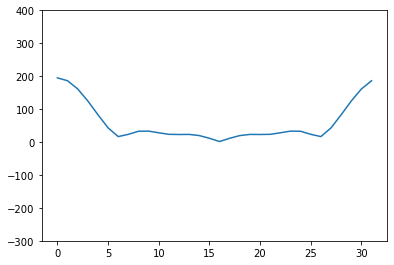

average fourier value:  37.406505877547374 max_four:  195.0670559573181
Mo 21.01.19 hour 14


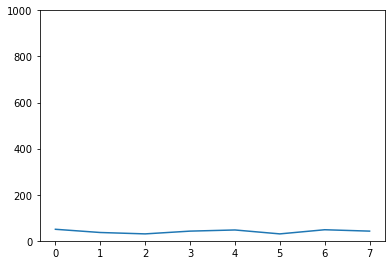

data:  245
average data value:  25.043234903270655


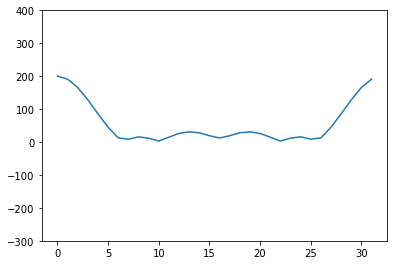

average fourier value:  33.18380571067057 max_four:  200.34587922616524
Mo 21.01.19 hour 15


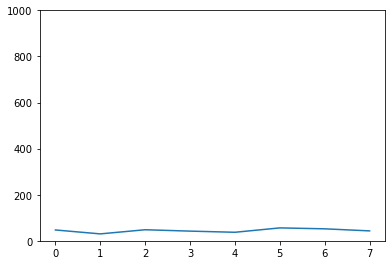

data:  246
average data value:  29.14041978652611


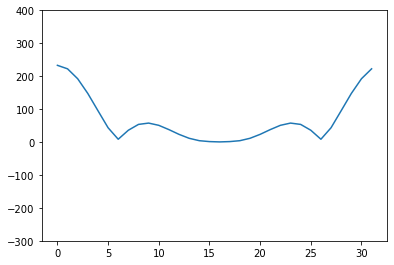

average fourier value:  43.93474440483696 max_four:  233.1233582922089
Mo 21.01.19 hour 16


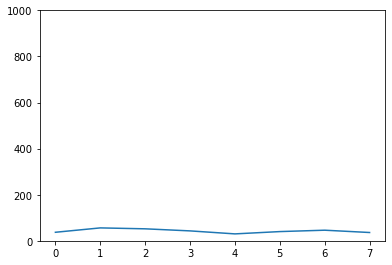

data:  247
average data value:  28.418570953971503


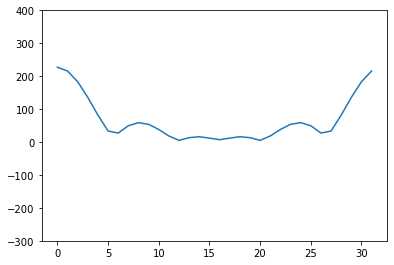

average fourier value:  41.83578104601839 max_four:  227.34856763177206
Mo 21.01.19 hour 17


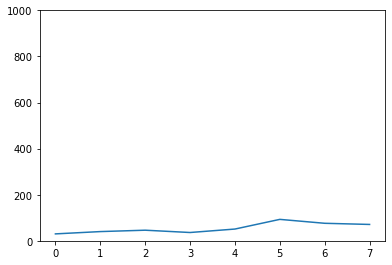

data:  248
average data value:  37.11327677118329


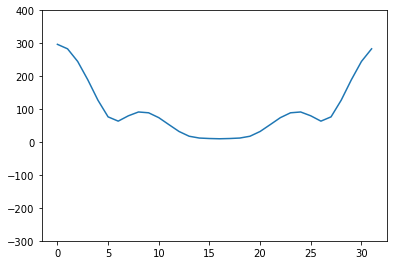

average fourier value:  70.48308249084815 max_four:  296.9062141694663
Mo 21.01.19 hour 18


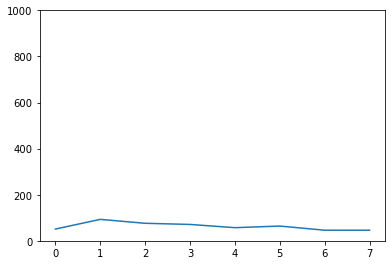

data:  249
average data value:  44.12065061374548


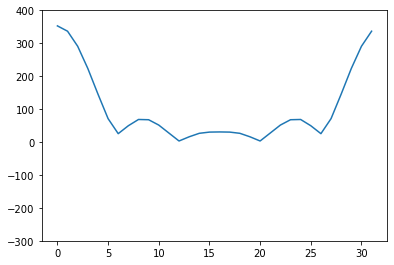

average fourier value:  62.092379280719086 max_four:  352.96520490996386
Mo 21.01.19 hour 19


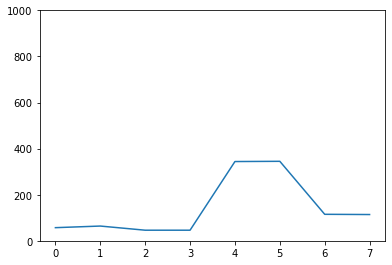

data:  250
average data value:  111.30195294863627


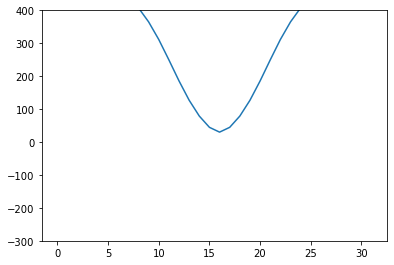

average fourier value:  353.5443555077672 max_four:  890.4156235890902
Mo 21.01.19 hour 20


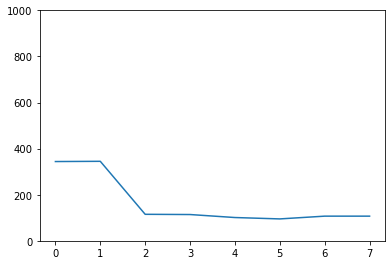

data:  251
average data value:  87.66121638426588


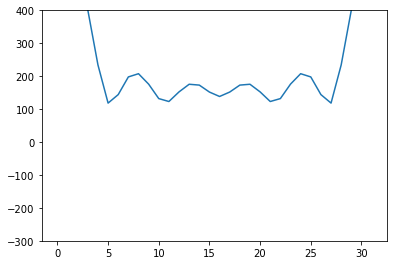

average fourier value:  183.67776417837948 max_four:  701.2897310741271


<Figure size 432x288 with 0 Axes>

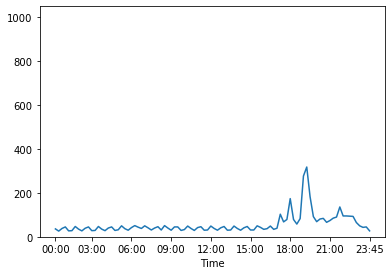

Di 22.01.19 hour 9


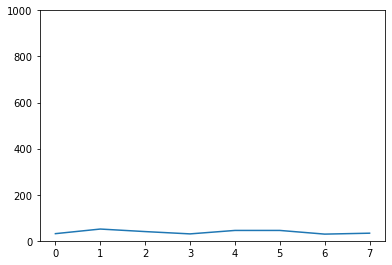

data:  252
average data value:  26.11260466978157


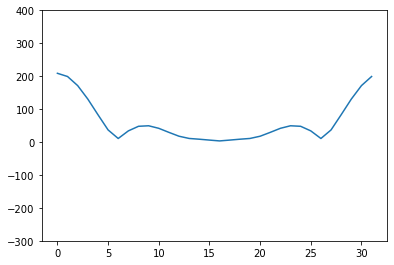

average fourier value:  39.01479167909547 max_four:  208.9008373582526
Di 22.01.19 hour 10


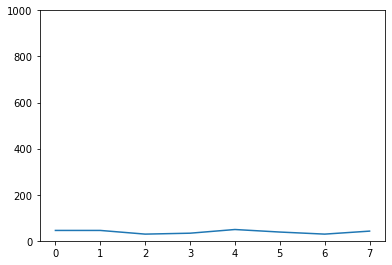

data:  253
average data value:  24.279159319547954


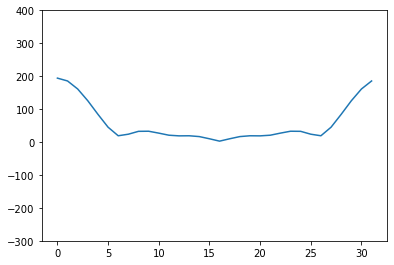

average fourier value:  36.5946426957393 max_four:  194.23327455638366
Di 22.01.19 hour 11


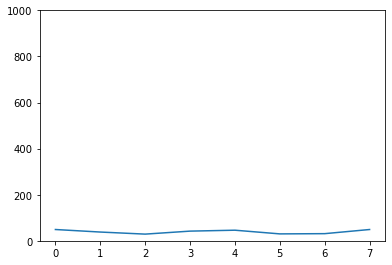

data:  254
average data value:  23.647121527686608


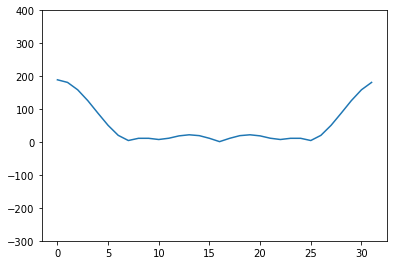

average fourier value:  31.031564652087415 max_four:  189.17697222149286
Di 22.01.19 hour 12


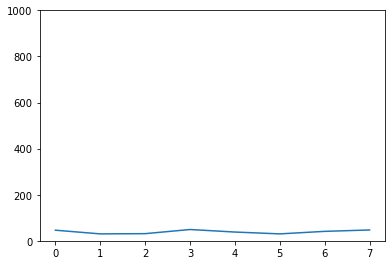

data:  255
average data value:  23.924936644431146


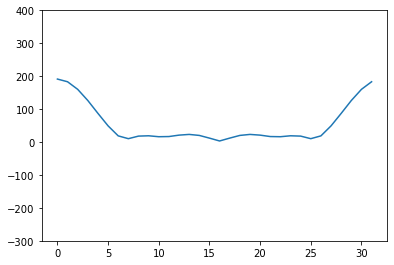

average fourier value:  33.69885828735384 max_four:  191.3994931554492
Di 22.01.19 hour 13


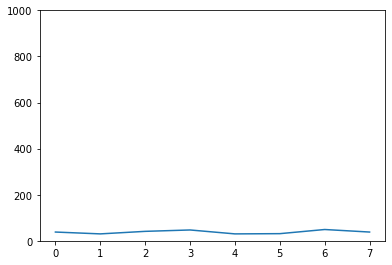

data:  256
average data value:  24.6611971114093


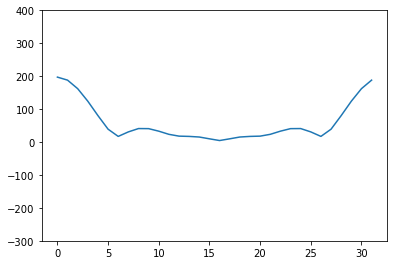

average fourier value:  37.7116453736243 max_four:  197.28957689127444
Di 22.01.19 hour 14


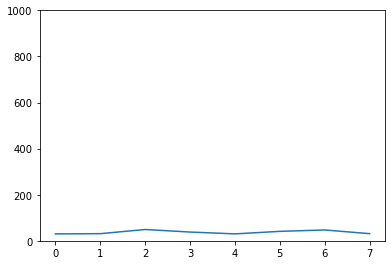

data:  257
average data value:  25.709789553037034


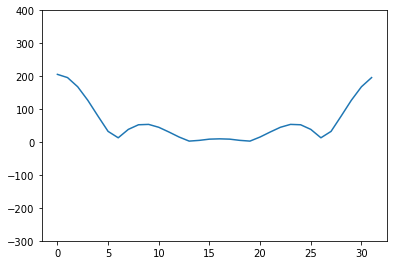

average fourier value:  38.74384267084574 max_four:  205.67831642429627
Di 22.01.19 hour 15


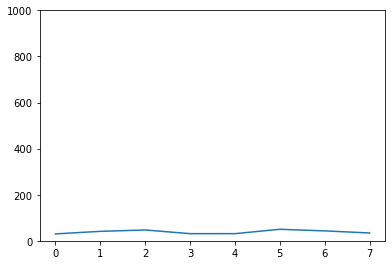

data:  258
average data value:  26.29323490327065


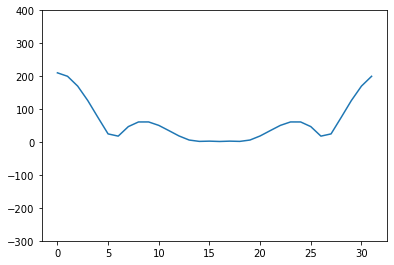

average fourier value:  40.59135694470621 max_four:  210.3458792261652
Di 22.01.19 hour 16


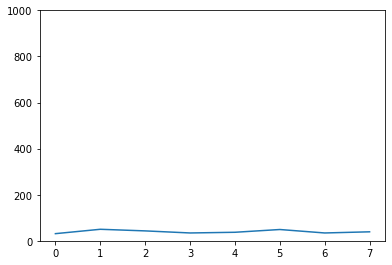

data:  259
average data value:  26.79323490327065


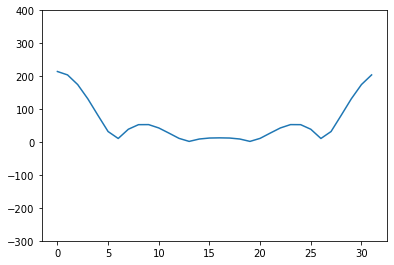

average fourier value:  38.84819073003709 max_four:  214.3458792261652
Di 22.01.19 hour 17


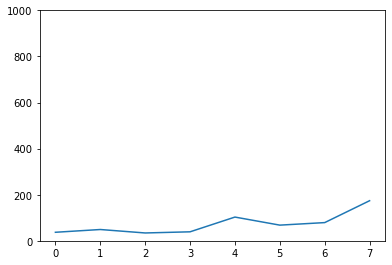

data:  260
average data value:  40.28016747165052


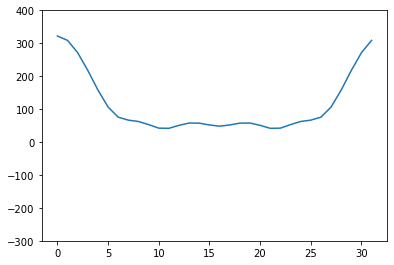

average fourier value:  80.11971929171126 max_four:  322.2413397732042
Di 22.01.19 hour 18


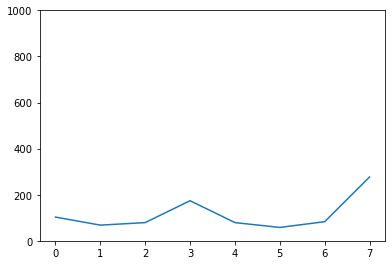

data:  261
average data value:  60.287541314212724


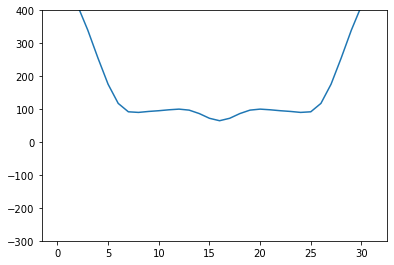

average fourier value:  131.7189302602871 max_four:  482.3003305137018
Di 22.01.19 hour 19


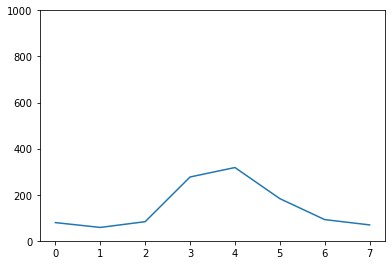

data:  262
average data value:  119.08613375584045


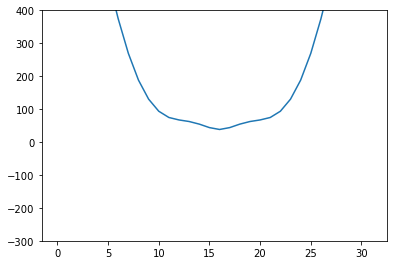

average fourier value:  249.30036028576959 max_four:  952.6890700467236
Di 22.01.19 hour 20


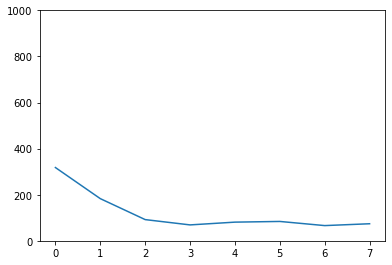

data:  263
average data value:  59.775482034695145


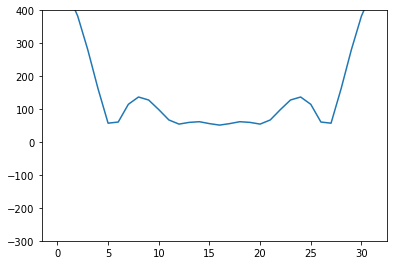

average fourier value:  102.95106124735807 max_four:  478.20385627756116


<Figure size 432x288 with 0 Axes>

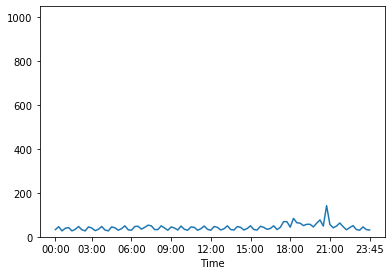

Mi 23.01.19 hour 9


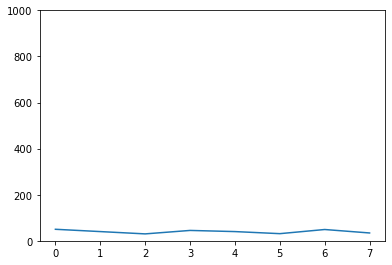

data:  264
average data value:  25.050272695132


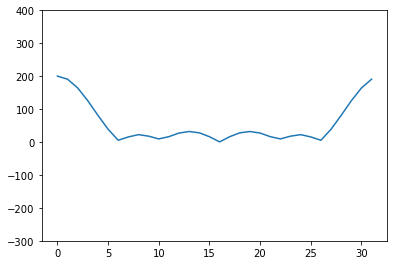

average fourier value:  33.599843035029295 max_four:  200.402181561056
Mi 23.01.19 hour 10


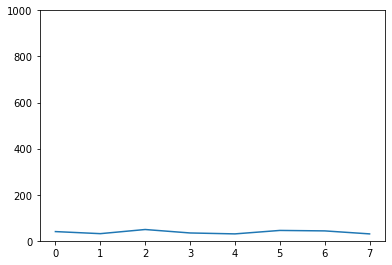

data:  265
average data value:  25.404159319547954


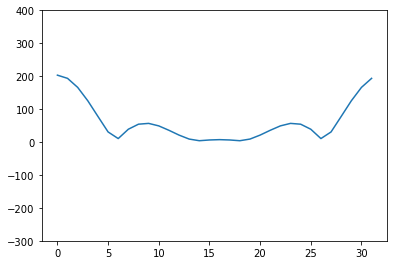

average fourier value:  40.00153403975784 max_four:  203.23327455638363
Mi 23.01.19 hour 11


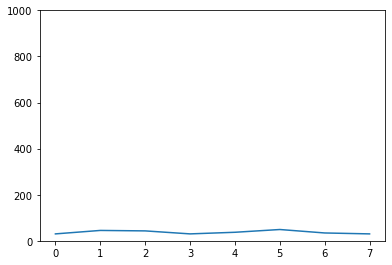

data:  266
average data value:  25.911197111409304


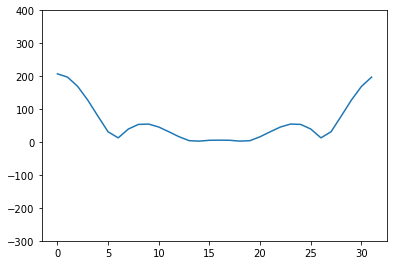

average fourier value:  38.7149308959397 max_four:  207.28957689127444
Mi 23.01.19 hour 12


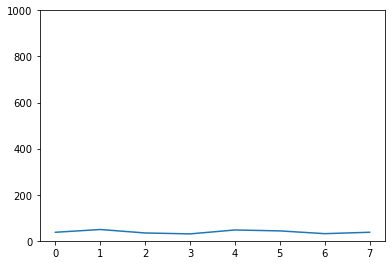

data:  267
average data value:  25.362604669781575


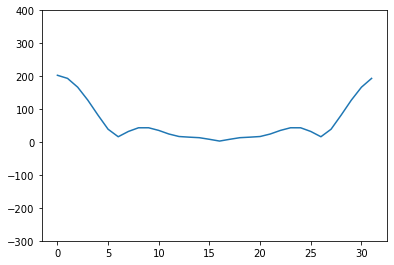

average fourier value:  38.20148542907954 max_four:  202.9008373582526
Mi 23.01.19 hour 13


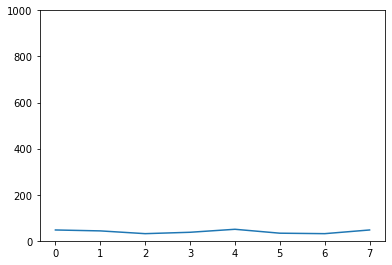

data:  268
average data value:  24.529159319547958


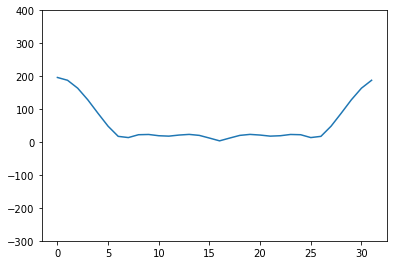

average fourier value:  34.960488230061515 max_four:  196.23327455638366
Mi 23.01.19 hour 14


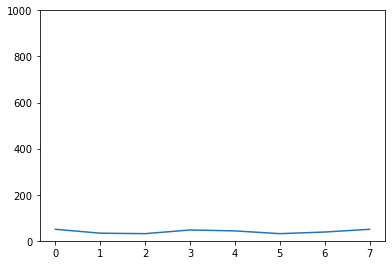

data:  269
average data value:  24.42493664443115


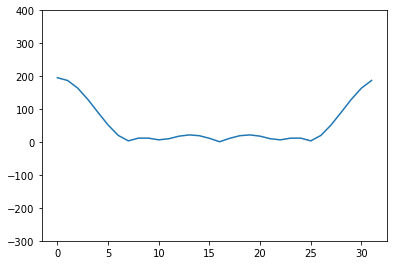

average fourier value:  31.287951108546768 max_four:  195.3994931554492
Mi 23.01.19 hour 15


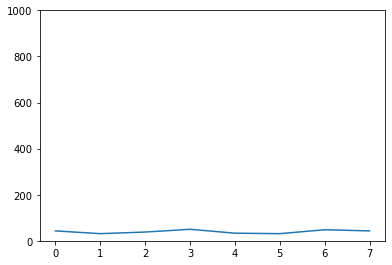

data:  270
average data value:  25.036197111409304


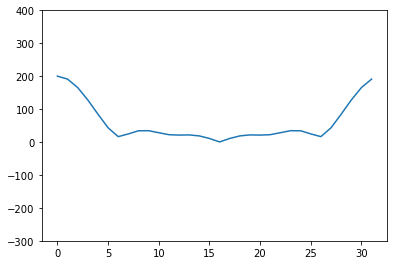

average fourier value:  37.64427974538085 max_four:  200.28957689127444
Mi 23.01.19 hour 16


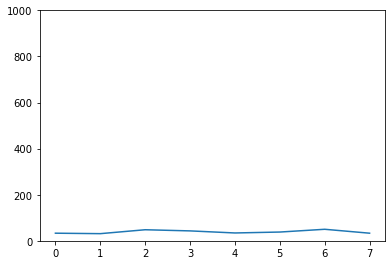

data:  271
average data value:  26.564012228153842


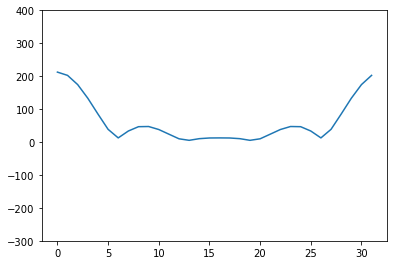

average fourier value:  38.221147189450775 max_four:  212.51209782523074
Mi 23.01.19 hour 17


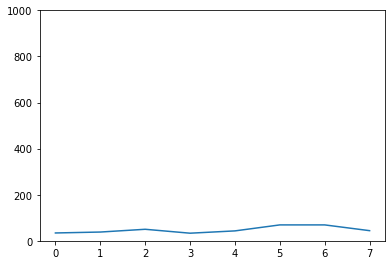

data:  272
average data value:  32.550608745832854


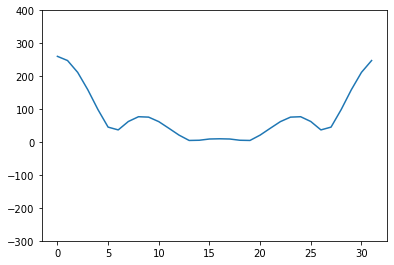

average fourier value:  53.824233786349616 max_four:  260.40486996666283
Mi 23.01.19 hour 18


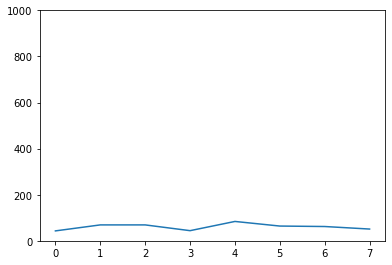

data:  273
average data value:  42.63439014676733


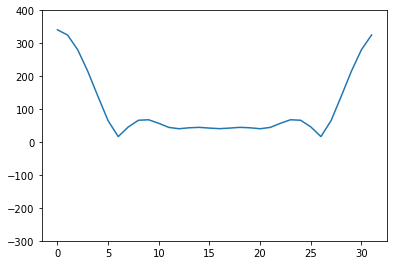

average fourier value:  68.26564199084143 max_four:  341.07512117413864
Mi 23.01.19 hour 19


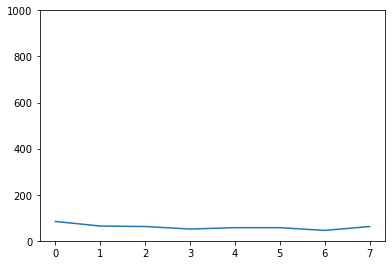

data:  274
average data value:  36.703423862577395


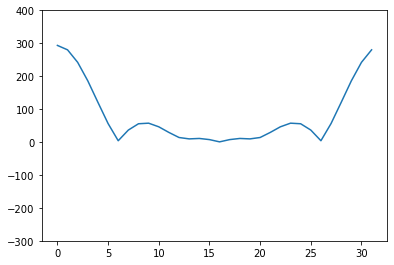

average fourier value:  48.73714018708761 max_four:  293.62739090061916
Mi 23.01.19 hour 20


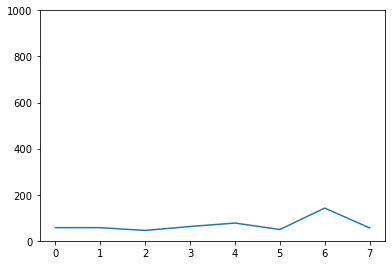

data:  275
average data value:  44.33010411608167


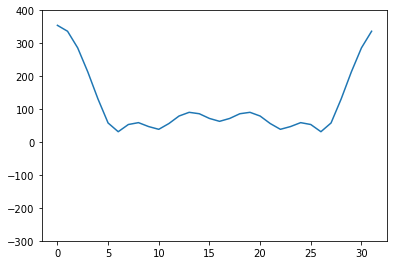

average fourier value:  78.07673444167774 max_four:  354.64083292865337


<Figure size 432x288 with 0 Axes>

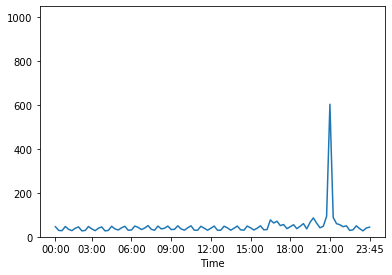

Do 24.01.19 hour 9


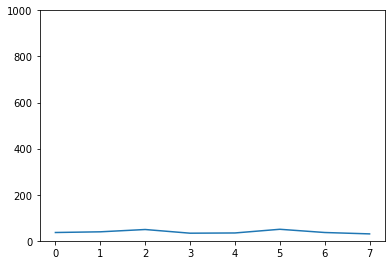

data:  276
average data value:  26.480566877920225


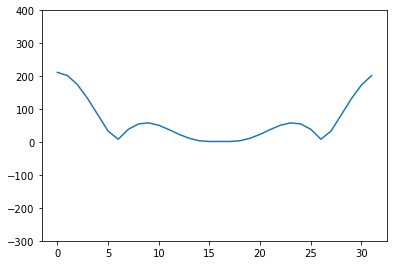

average fourier value:  41.326152268064604 max_four:  211.8445350233618
Do 24.01.19 hour 10


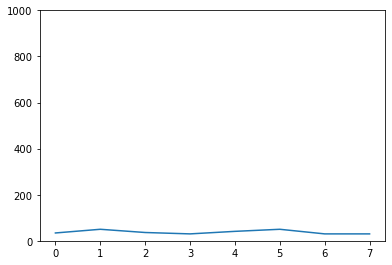

data:  277
average data value:  25.73760466978157


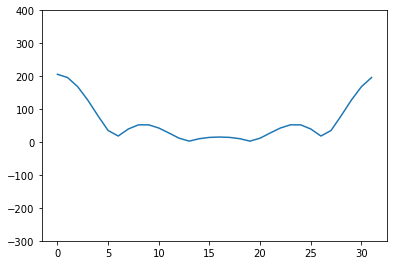

average fourier value:  39.57407825227392 max_four:  205.9008373582526
Do 24.01.19 hour 11


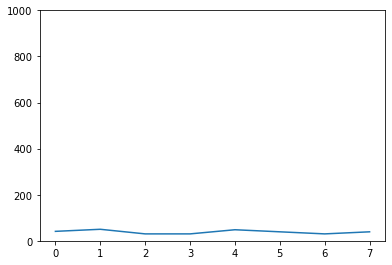

data:  278
average data value:  24.48760466978157


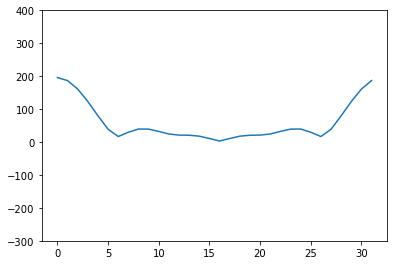

average fourier value:  38.055350692685515 max_four:  195.9008373582526
Do 24.01.19 hour 12


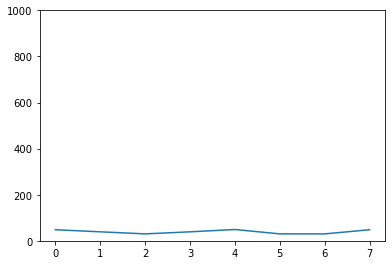

data:  279
average data value:  23.772121527686608


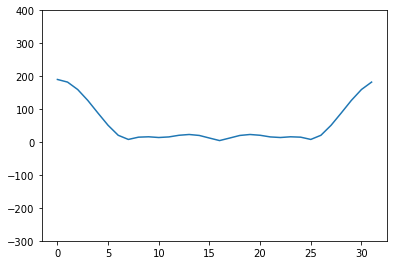

average fourier value:  33.090775248109054 max_four:  190.17697222149286
Do 24.01.19 hour 13


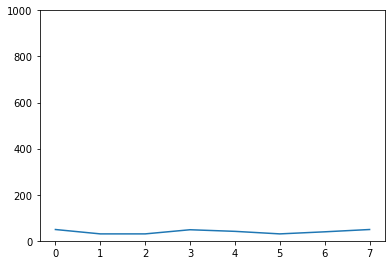

data:  280
average data value:  23.897121527686604


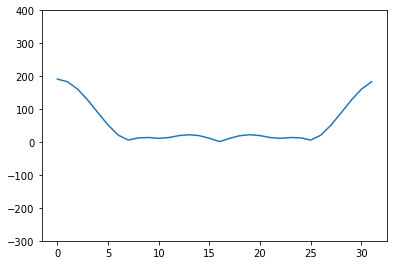

average fourier value:  32.29284747239247 max_four:  191.17697222149286
Do 24.01.19 hour 14


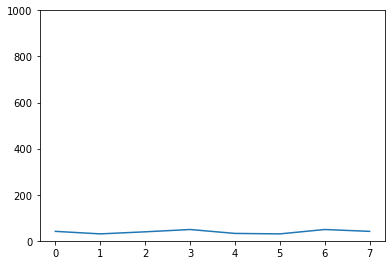

data:  281
average data value:  24.7861971114093


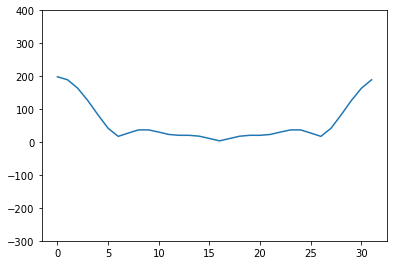

average fourier value:  37.88410027995113 max_four:  198.28957689127444
Do 24.01.19 hour 15


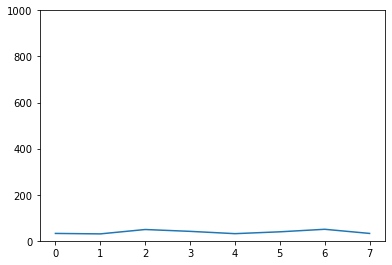

data:  282
average data value:  26.11260466978157


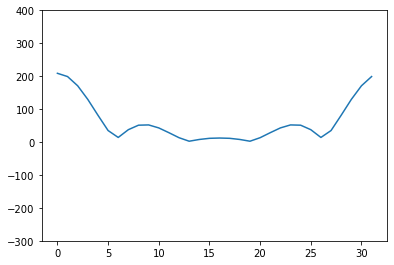

average fourier value:  39.03145940237402 max_four:  208.9008373582526
Do 24.01.19 hour 16


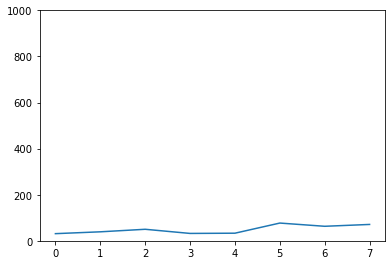

data:  283
average data value:  31.793570953971507


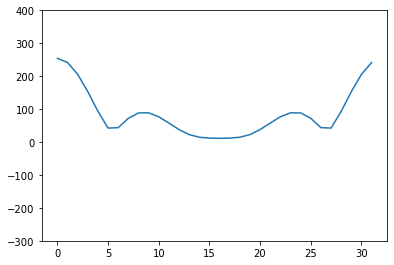

average fourier value:  61.82757207206897 max_four:  254.34856763177206
Do 24.01.19 hour 17


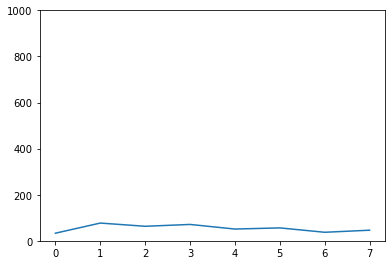

data:  284
average data value:  38.83546165443874


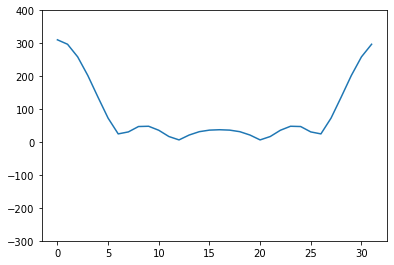

average fourier value:  54.67008176388374 max_four:  310.68369323550996
Do 24.01.19 hour 18


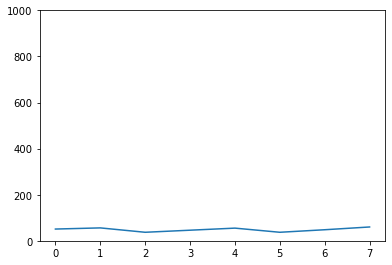

data:  285
average data value:  29.821386070716045


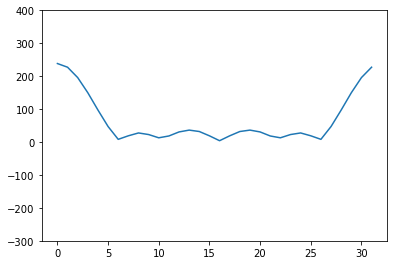

average fourier value:  40.12321160239032 max_four:  238.57108856572836
Do 24.01.19 hour 19


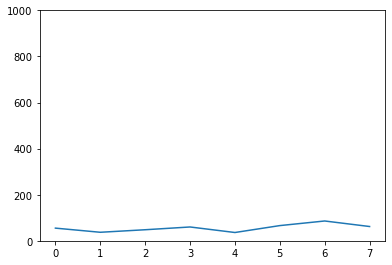

data:  286
average data value:  35.64812967978917


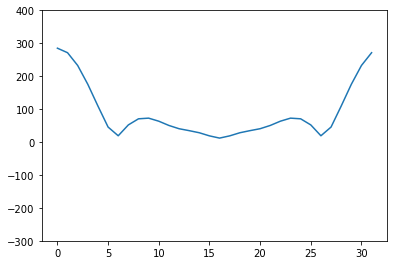

average fourier value:  60.072745736247825 max_four:  285.1850374383134
Do 24.01.19 hour 20


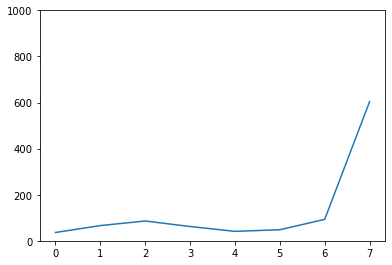

data:  287
average data value:  41.77380178119088


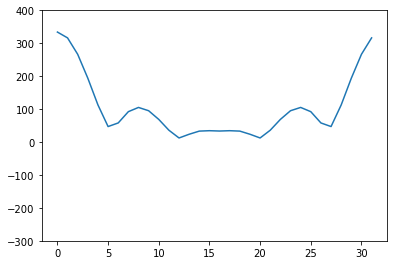

average fourier value:  70.26374140808096 max_four:  334.19041424952707


<Figure size 432x288 with 0 Axes>

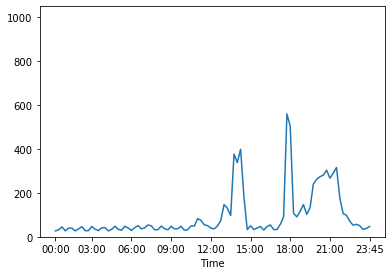

Fr 25.01.19 hour 9


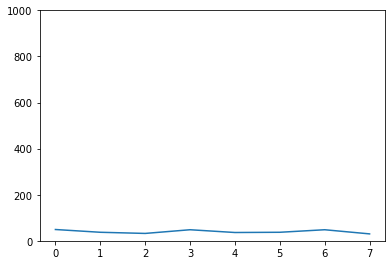

data:  288
average data value:  25.619642461642925


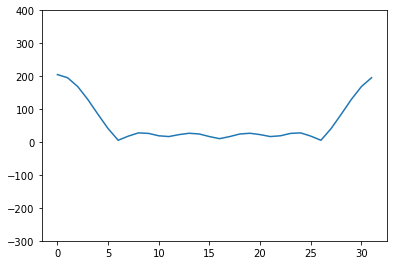

average fourier value:  35.273145770335105 max_four:  204.9571396931434
Fr 25.01.19 hour 10


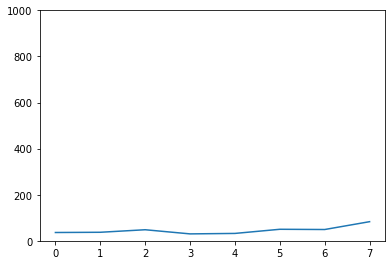

data:  289
average data value:  26.571050020015193


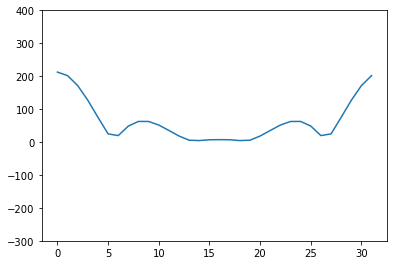

average fourier value:  41.75977934563536 max_four:  212.56840016012154
Fr 25.01.19 hour 11


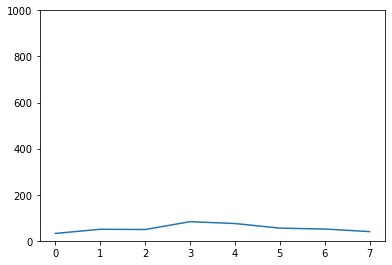

data:  290
average data value:  40.467163395599236


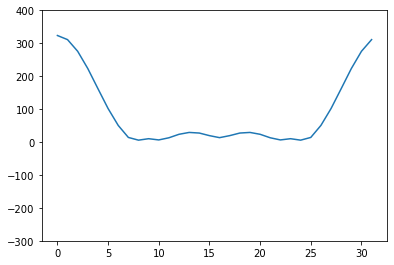

average fourier value:  52.84726724377974 max_four:  323.7373071647939
Fr 25.01.19 hour 12


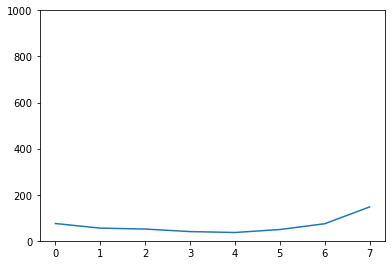

data:  291
average data value:  31.85657503002279


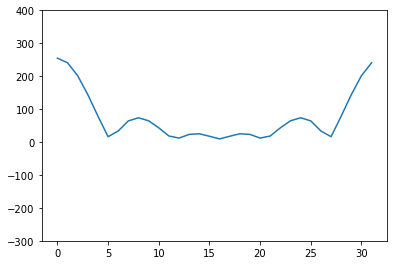

average fourier value:  47.32825780901007 max_four:  254.8526002401823
Fr 25.01.19 hour 13


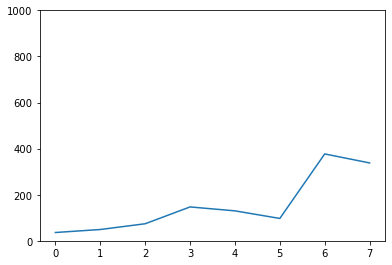

data:  292
average data value:  88.5496198665869


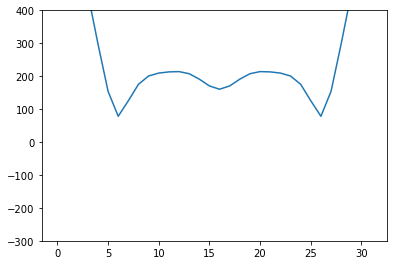

average fourier value:  206.99782231243398 max_four:  708.396958932695
Fr 25.01.19 hour 14


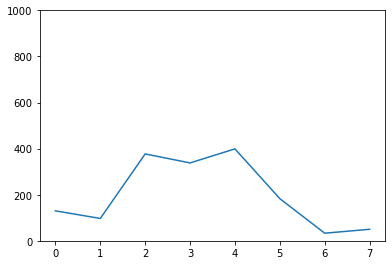

data:  293
average data value:  172.05798258839505


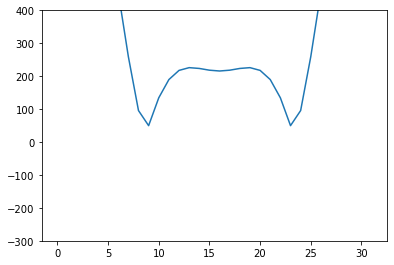

average fourier value:  362.2990539663016 max_four:  1376.4638607071606
Fr 25.01.19 hour 15


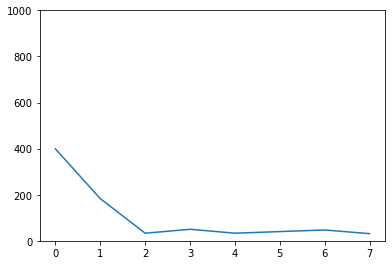

data:  294
average data value:  37.073738425622025


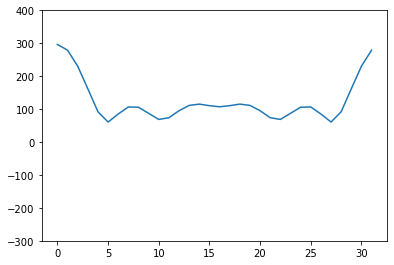

average fourier value:  98.06437306735356 max_four:  296.5899074049762
Fr 25.01.19 hour 16


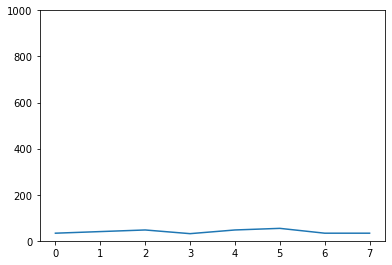

data:  295
average data value:  27.952751761175687


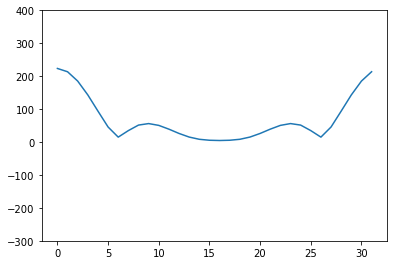

average fourier value:  45.03970976851979 max_four:  223.62201408940547
Fr 25.01.19 hour 17


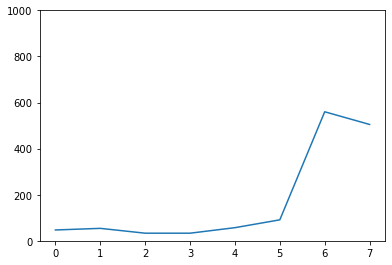

data:  296
average data value:  73.6642408405736


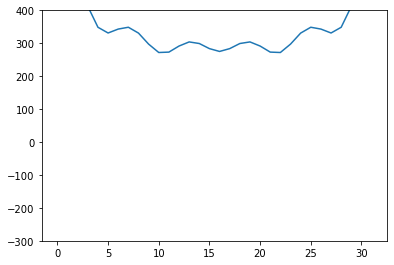

average fourier value:  318.2808819586619 max_four:  589.3139267245888
Fr 25.01.19 hour 18


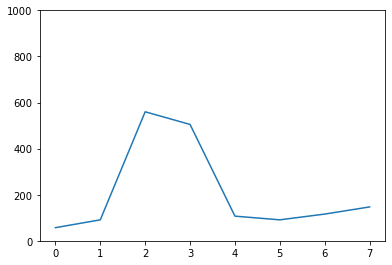

data:  297
average data value:  173.69136458305982


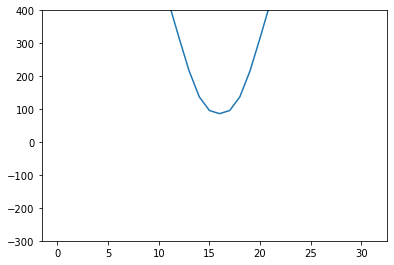

average fourier value:  554.6599989210811 max_four:  1389.5309166644786
Fr 25.01.19 hour 19


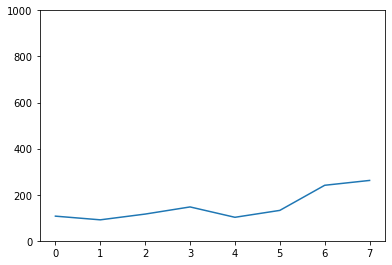

data:  298
average data value:  87.49230937959354


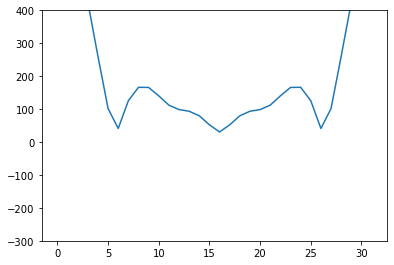

average fourier value:  143.366514099424 max_four:  699.9384750367483
Fr 25.01.19 hour 20


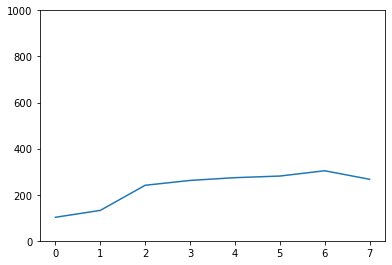

data:  299
average data value:  165.5636954503096


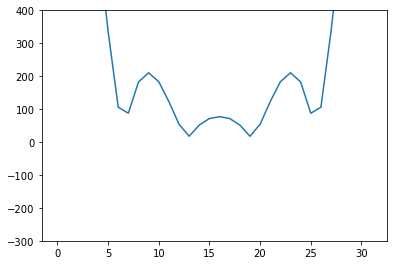

average fourier value:  224.23675951169403 max_four:  1324.5095636024766


<Figure size 432x288 with 0 Axes>

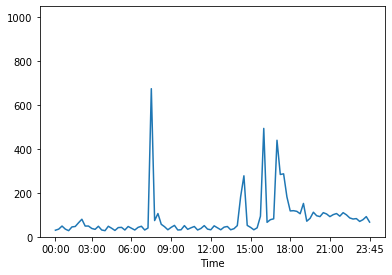

Sa 26.01.19 hour 9


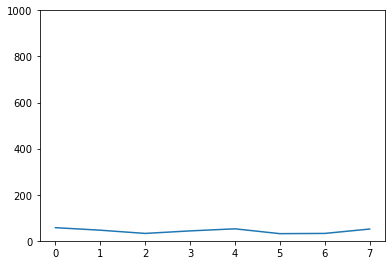

data:  300
average data value:  25.709789553037034


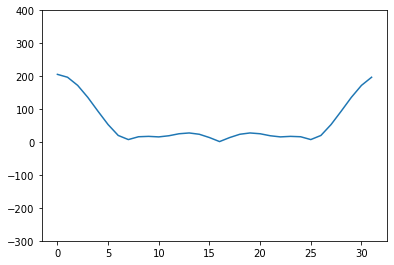

average fourier value:  36.059158770729 max_four:  205.67831642429627
Sa 26.01.19 hour 10


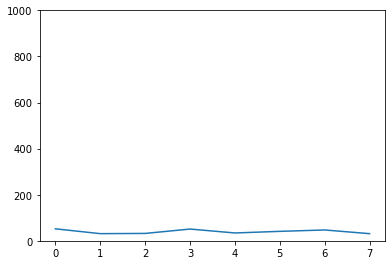

data:  301
average data value:  25.709789553037034


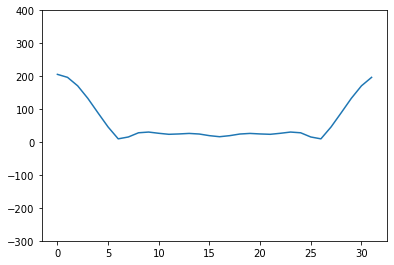

average fourier value:  38.17268733434655 max_four:  205.67831642429627
Sa 26.01.19 hour 11


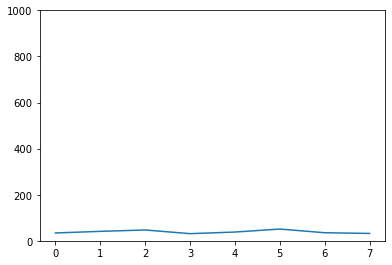

data:  302
average data value:  26.681974436292496


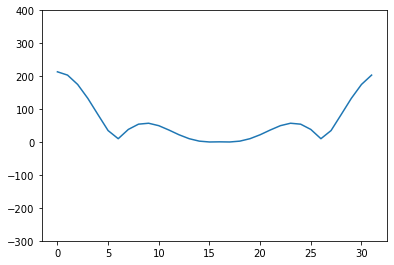

average fourier value:  41.002247698259254 max_four:  213.45579549033994
Sa 26.01.19 hour 12


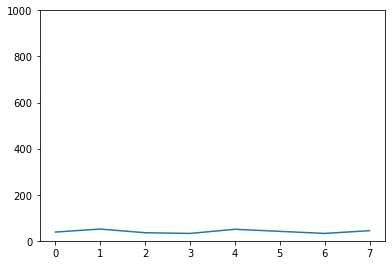

data:  303
average data value:  26.091827344898384


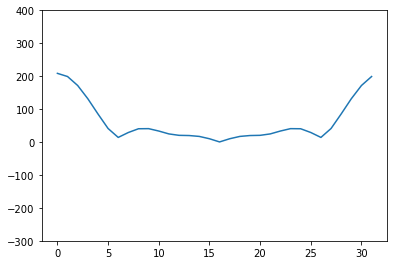

average fourier value:  39.09643269401485 max_four:  208.73461875918707
Sa 26.01.19 hour 13


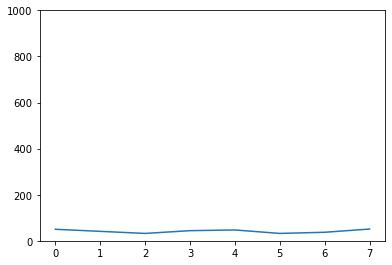

data:  304
average data value:  25.334789553037034


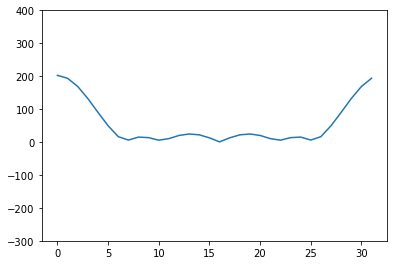

average fourier value:  32.224520971191126 max_four:  202.67831642429627
Sa 26.01.19 hour 14


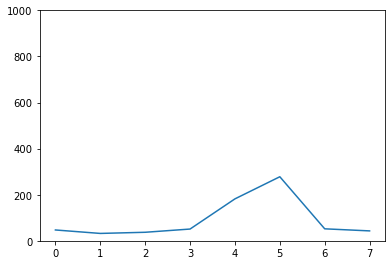

data:  305
average data value:  74.91823490327066


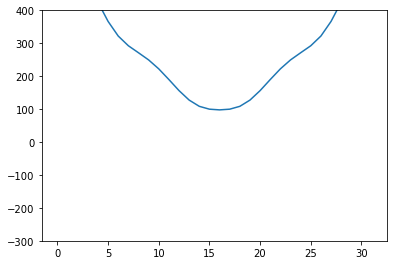

average fourier value:  255.4288666702591 max_four:  599.3458792261652
Sa 26.01.19 hour 15


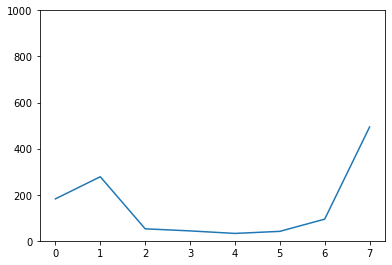

data:  306
average data value:  49.423611714484316


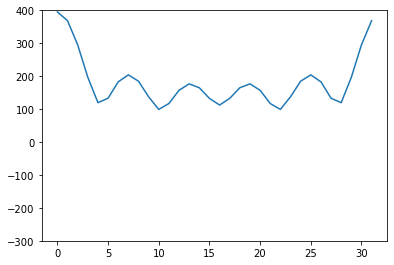

average fourier value:  154.39192625401705 max_four:  395.3888937158745
Sa 26.01.19 hour 16


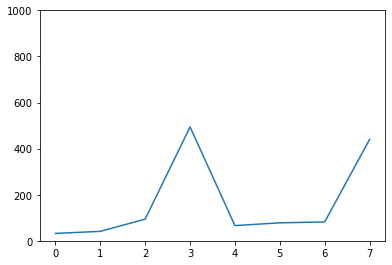

data:  307
average data value:  100.89812967978916


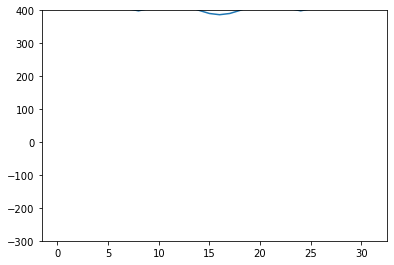

average fourier value:  448.57135065923495 max_four:  807.1850374383134
Sa 26.01.19 hour 17


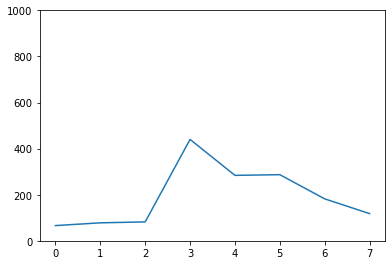

data:  308
average data value:  156.49096517679013


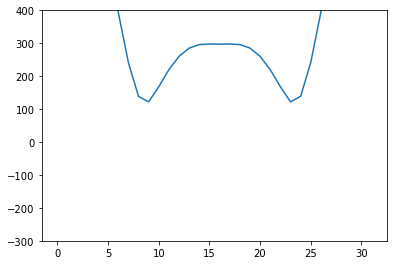

average fourier value:  364.2425440615489 max_four:  1251.927721414321
Sa 26.01.19 hour 18


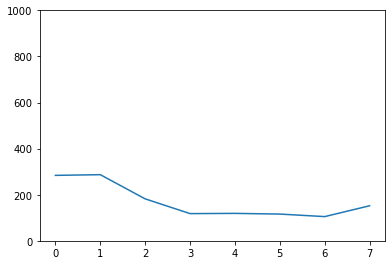

data:  309
average data value:  96.82676288192971


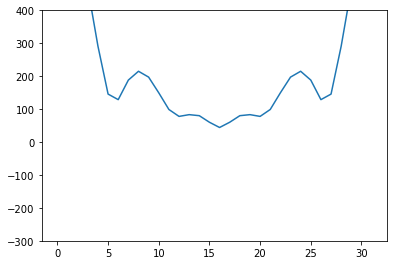

average fourier value:  168.06435920050325 max_four:  774.6141030554377
Sa 26.01.19 hour 19


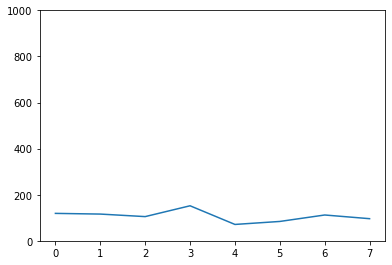

data:  310
average data value:  68.92092330887749


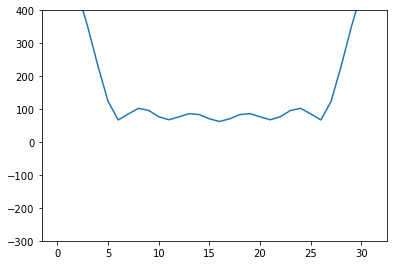

average fourier value:  116.70435749906733 max_four:  551.3673864710199
Sa 26.01.19 hour 20


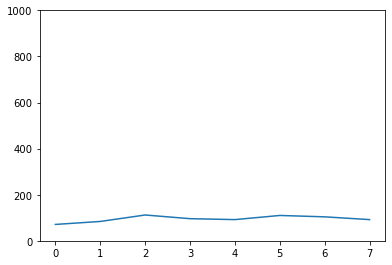

data:  311
average data value:  65.6146209739867


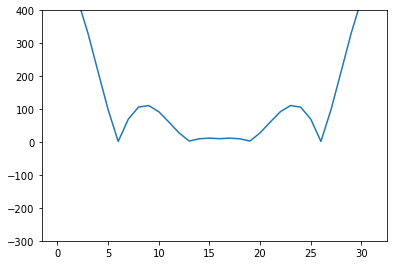

average fourier value:  87.71811054944509 max_four:  524.9169677918935


<Figure size 432x288 with 0 Axes>

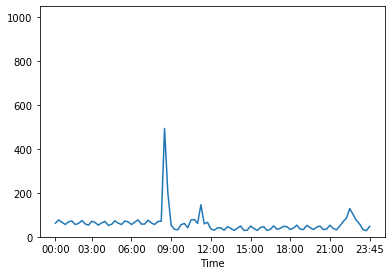

So 27.01.19 hour 9


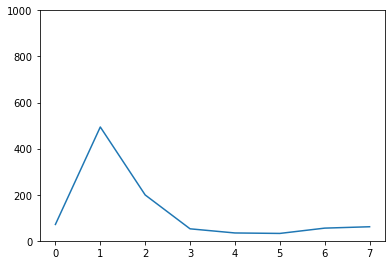

data:  312
average data value:  81.57274954637604


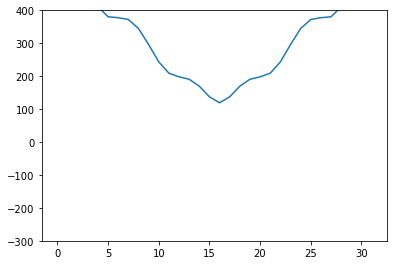

average fourier value:  293.17271314357095 max_four:  652.5819963710084
So 27.01.19 hour 10


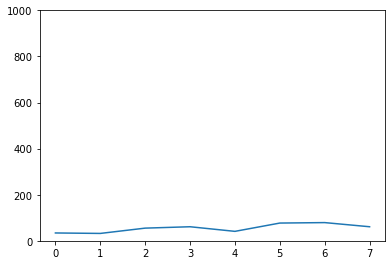

data:  313
average data value:  37.73123897932194


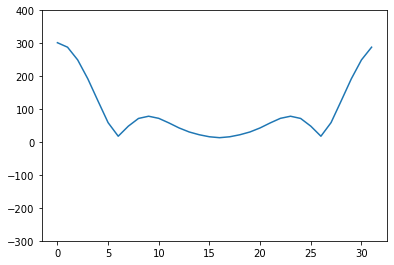

average fourier value:  64.1995071363907 max_four:  301.8499118345755
So 27.01.19 hour 11


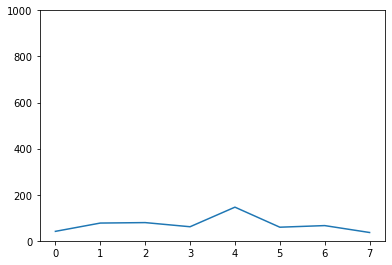

data:  314
average data value:  54.05128084723456


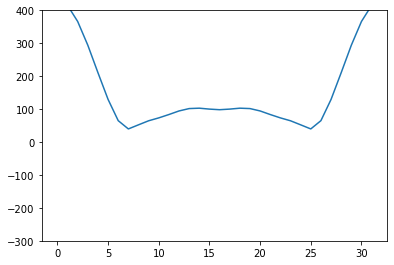

average fourier value:  108.66906221793808 max_four:  432.4102467778765
So 27.01.19 hour 12


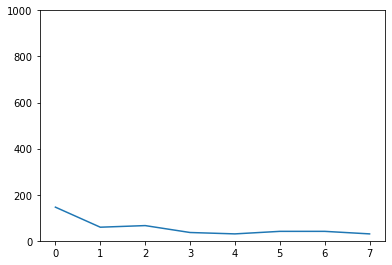

data:  315
average data value:  29.265755837226965


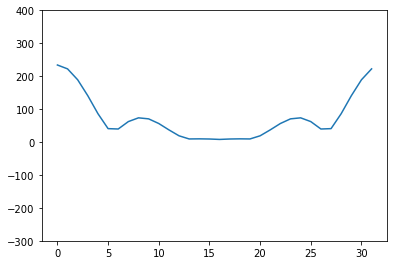

average fourier value:  50.34602520149245 max_four:  234.12604669781575
So 27.01.19 hour 13


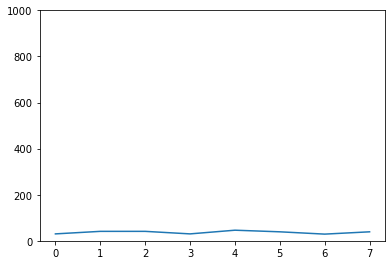

data:  316
average data value:  24.848529086058875


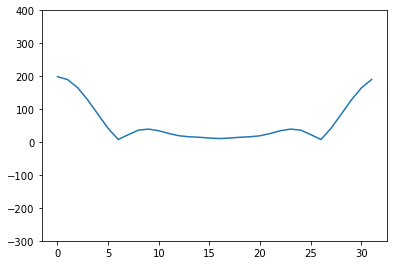

average fourier value:  37.11256310451345 max_four:  198.788232688471
So 27.01.19 hour 14


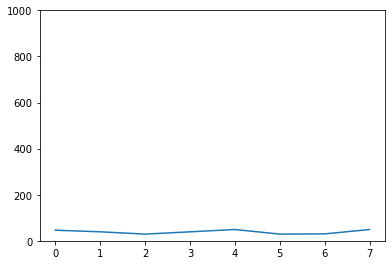

data:  317
average data value:  23.522121527686608


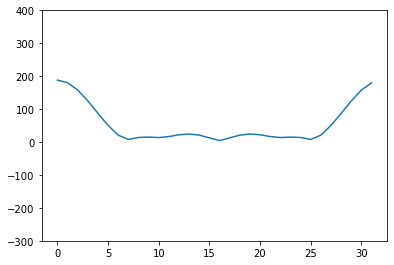

average fourier value:  33.23667797250185 max_four:  188.17697222149286
So 27.01.19 hour 15


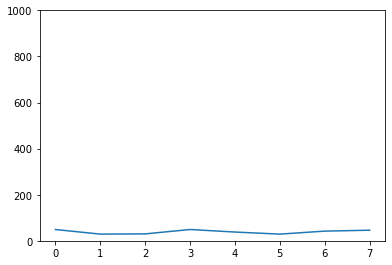

data:  318
average data value:  23.67493664443115


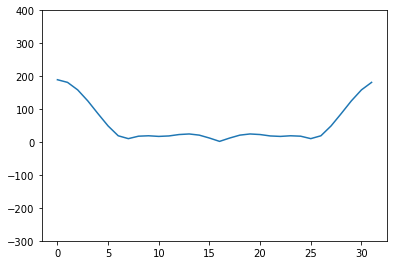

average fourier value:  34.084763959575746 max_four:  189.3994931554492
So 27.01.19 hour 16


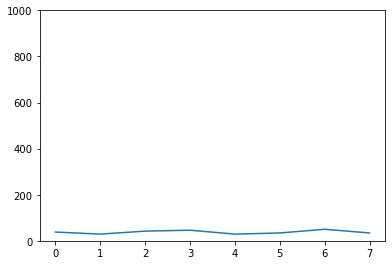

data:  319
average data value:  24.911197111409304


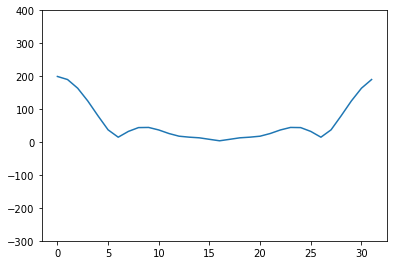

average fourier value:  37.98751114723097 max_four:  199.28957689127444
So 27.01.19 hour 17


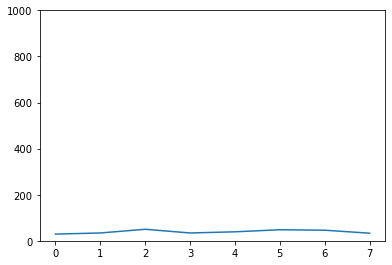

data:  320
average data value:  27.487604669781575


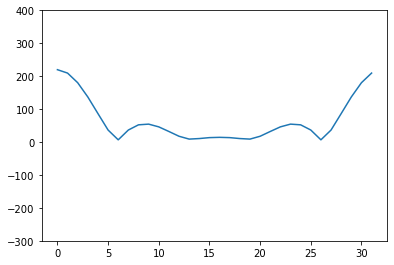

average fourier value:  41.47506432639274 max_four:  219.9008373582526
So 27.01.19 hour 18


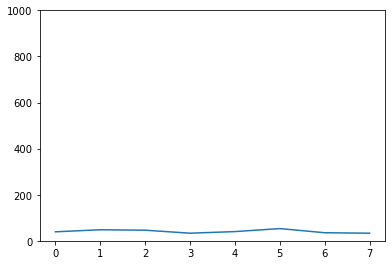

data:  321
average data value:  27.841827344898384


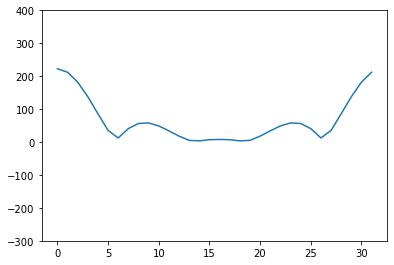

average fourier value:  41.806193041602754 max_four:  222.73461875918707
So 27.01.19 hour 19


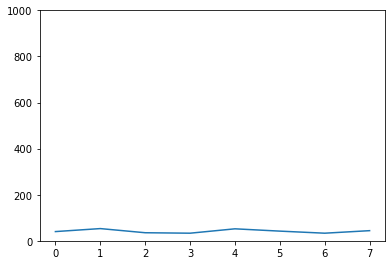

data:  322
average data value:  26.82105002001519


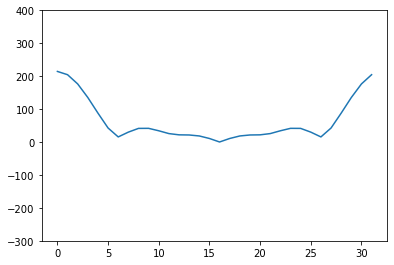

average fourier value:  40.592606438876686 max_four:  214.56840016012154
So 27.01.19 hour 20


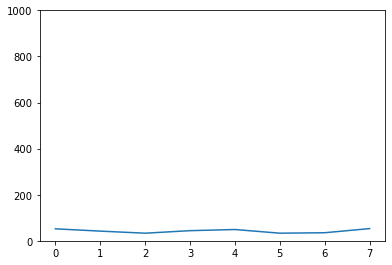

data:  323
average data value:  25.758381994664767


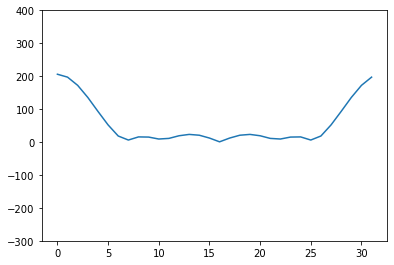

average fourier value:  33.21415862836817 max_four:  206.06705595731813


<Figure size 432x288 with 0 Axes>

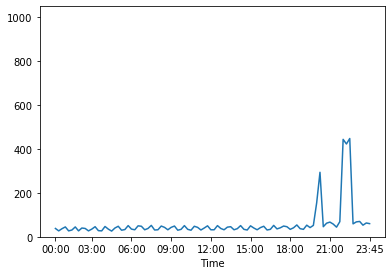

Mo 28.01.19 hour 9


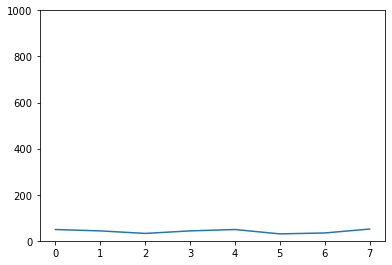

data:  324
average data value:  25.133381994664767


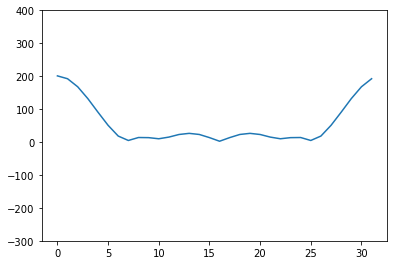

average fourier value:  33.48088609385688 max_four:  201.06705595731813
Mo 28.01.19 hour 10


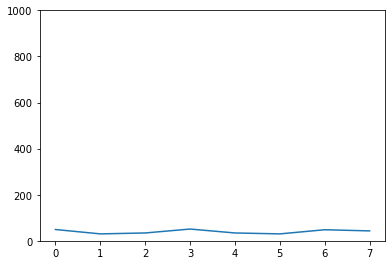

data:  325
average data value:  24.584789553037034


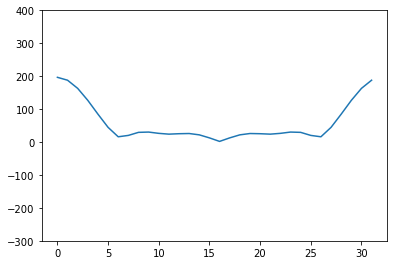

average fourier value:  37.575593379516455 max_four:  196.67831642429627
Mo 28.01.19 hour 11


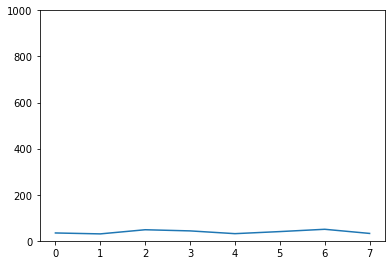

data:  326
average data value:  26.36260466978157


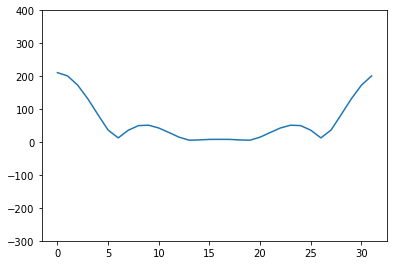

average fourier value:  39.073002112853764 max_four:  210.9008373582526
Mo 28.01.19 hour 12


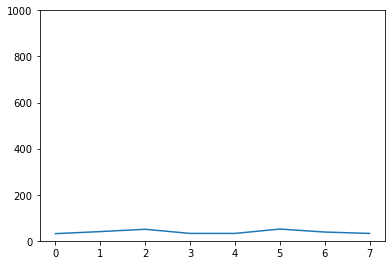

data:  327
average data value:  26.584789553037037


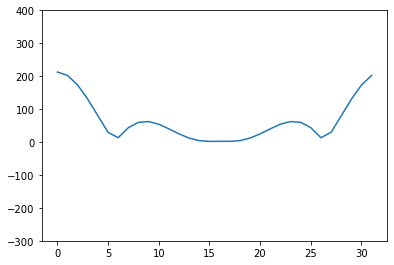

average fourier value:  42.75701915832052 max_four:  212.67831642429627
Mo 28.01.19 hour 13


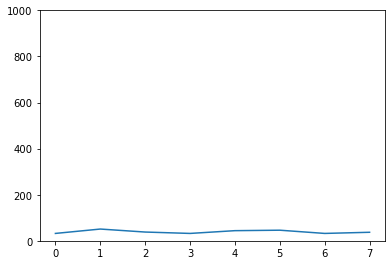

data:  328
average data value:  26.341827344898384


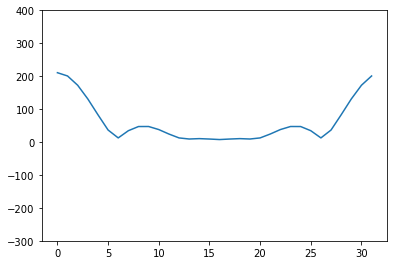

average fourier value:  38.14252673833495 max_four:  210.73461875918707
Mo 28.01.19 hour 14


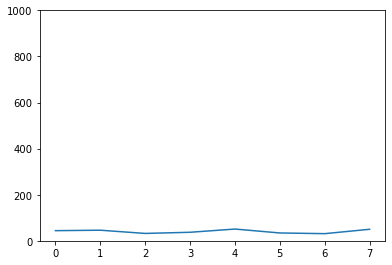

data:  329
average data value:  25.133381994664767


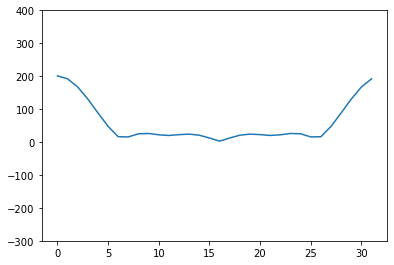

average fourier value:  36.30563772752901 max_four:  201.06705595731813
Mo 28.01.19 hour 15


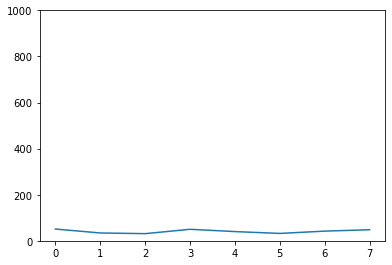

data:  330
average data value:  24.9319744362925


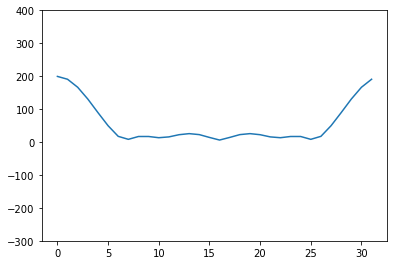

average fourier value:  34.05560017810695 max_four:  199.45579549033997
Mo 28.01.19 hour 16


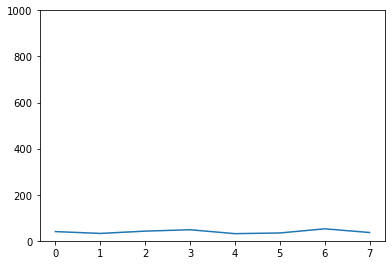

data:  331
average data value:  25.79323490327065


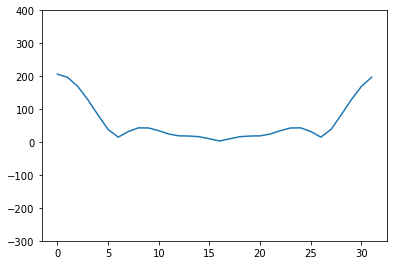

average fourier value:  38.82834756472547 max_four:  206.3458792261652
Mo 28.01.19 hour 17


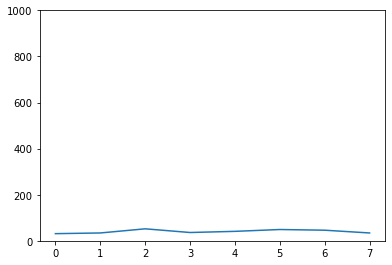

data:  332
average data value:  28.362604669781575


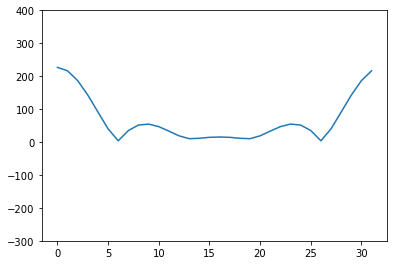

average fourier value:  42.6402079045799 max_four:  226.9008373582526
Mo 28.01.19 hour 18


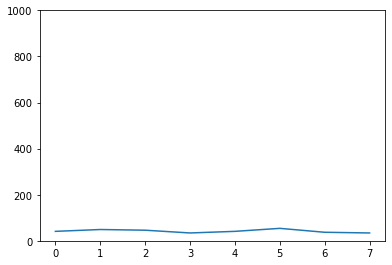

data:  333
average data value:  28.446050020015193


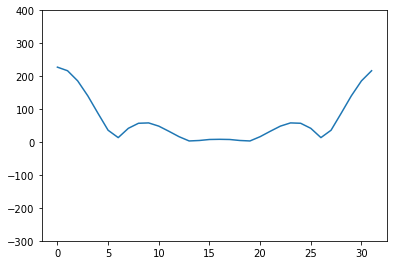

average fourier value:  42.12908399250413 max_four:  227.56840016012154
Mo 28.01.19 hour 19


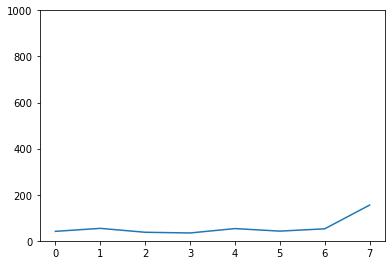

data:  334
average data value:  28.849201187460586


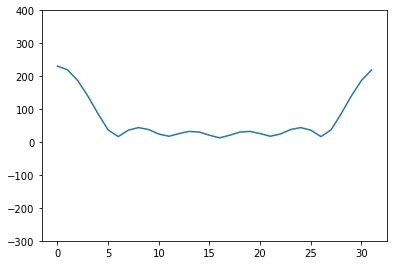

average fourier value:  42.23140943977293 max_four:  230.7936094996847
Mo 28.01.19 hour 20


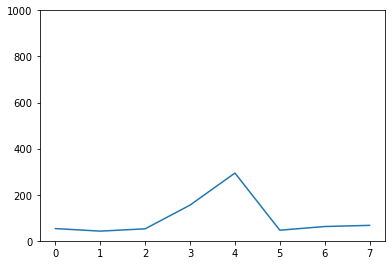

data:  335
average data value:  76.32138607071604


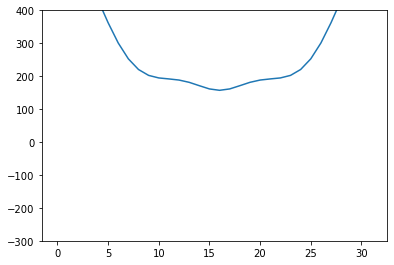

average fourier value:  258.5521794975103 max_four:  610.5710885657284


<Figure size 432x288 with 0 Axes>

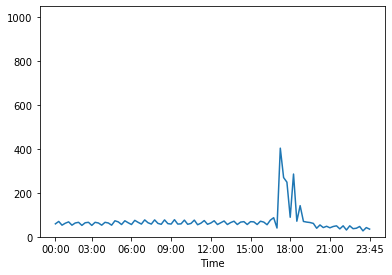

Di 29.01.19 hour 9


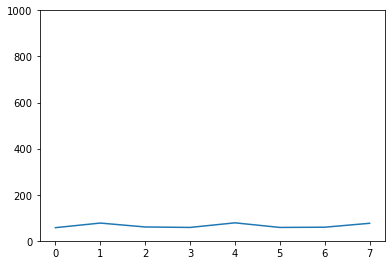

data:  336
average data value:  42.141427938628674


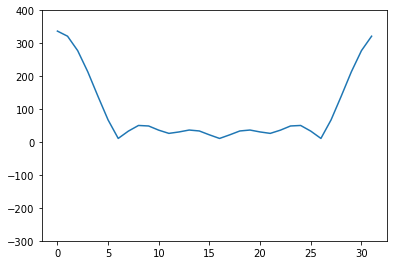

average fourier value:  57.56666709897058 max_four:  337.13142350902945
Di 29.01.19 hour 10


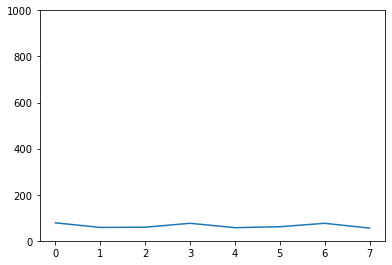

data:  337
average data value:  41.86361282188414


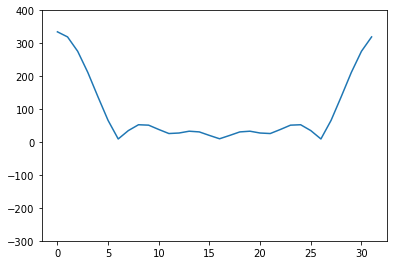

average fourier value:  56.810508831719275 max_four:  334.9089025750731
Di 29.01.19 hour 11


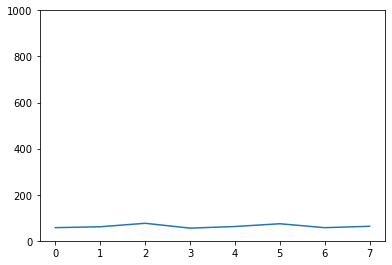

data:  338
average data value:  42.39109188792782


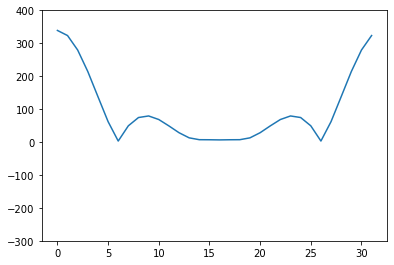

average fourier value:  61.03547756254372 max_four:  339.12873510342257
Di 29.01.19 hour 12


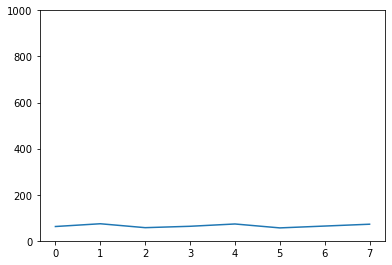

data:  339
average data value:  41.669243055373215


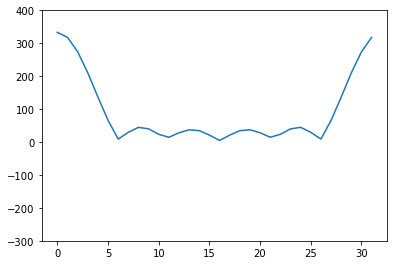

average fourier value:  53.49367699550233 max_four:  333.3539444429857
Di 29.01.19 hour 13


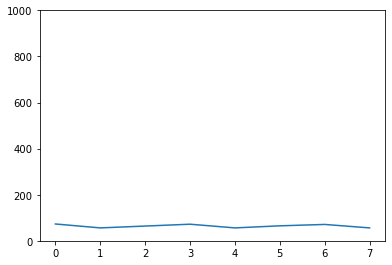

data:  340
average data value:  41.82875991327825


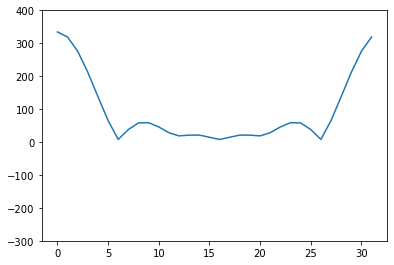

average fourier value:  56.03641521733071 max_four:  334.630079306226
Di 29.01.19 hour 14


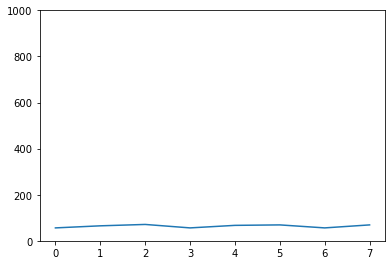

data:  341
average data value:  42.12031456304463


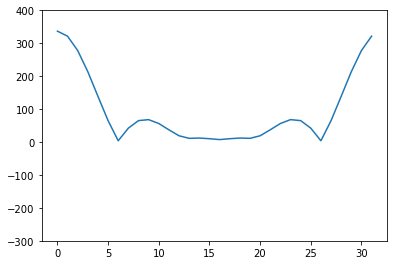

average fourier value:  57.19055838165389 max_four:  336.96251650435704
Di 29.01.19 hour 15


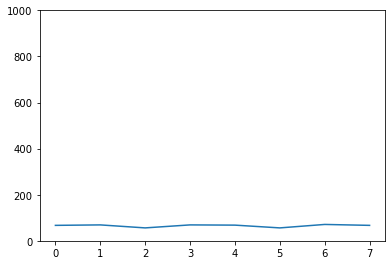

data:  342
average data value:  41.82205817211776


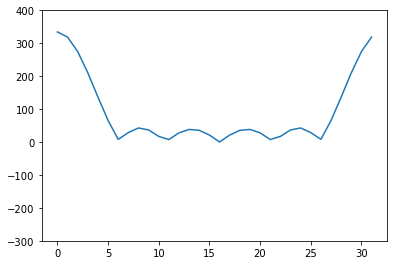

average fourier value:  52.11991663511182 max_four:  334.57646537694205
Di 29.01.19 hour 16


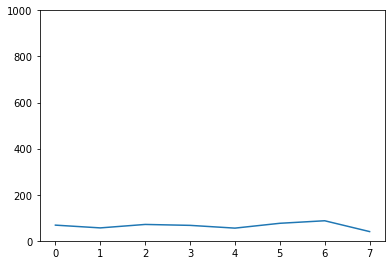

data:  343
average data value:  44.551280847234565


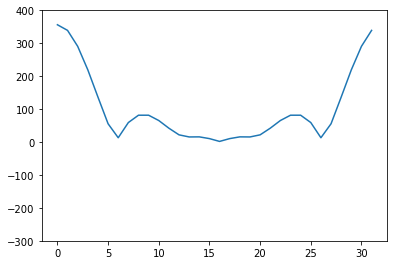

average fourier value:  62.95529735406155 max_four:  356.4102467778765
Di 29.01.19 hour 17


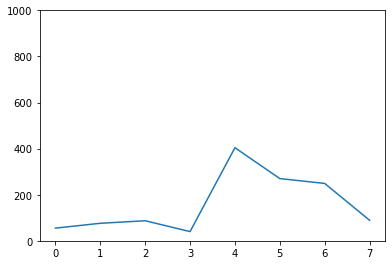

data:  344
average data value:  124.95745647098765


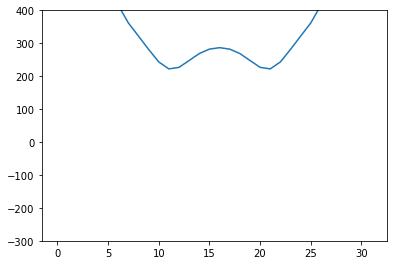

average fourier value:  365.6859610486677 max_four:  999.6596517679012
Di 29.01.19 hour 18


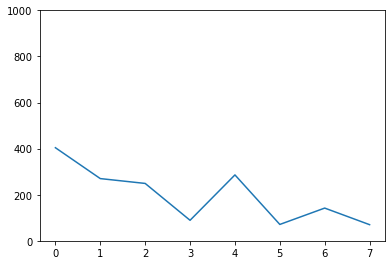

data:  345
average data value:  118.3549140493751


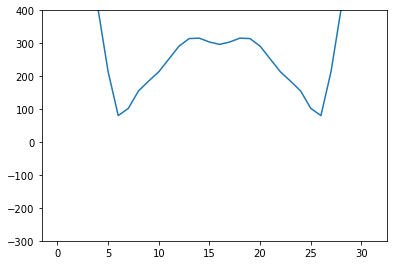

average fourier value:  264.7900114729732 max_four:  946.8393123950009
Di 29.01.19 hour 19


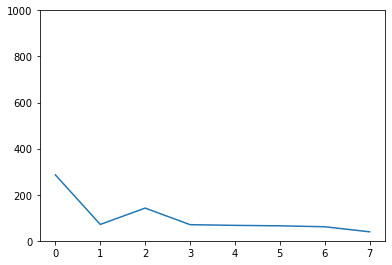

data:  346
average data value:  53.0857977051396


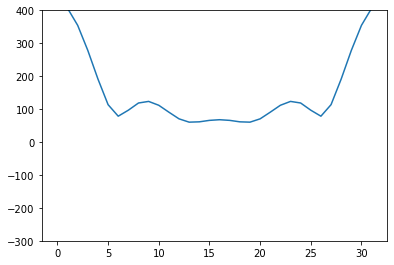

average fourier value:  112.45264076174743 max_four:  424.6863816411168
Di 29.01.19 hour 20


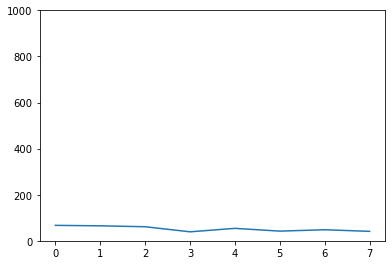

data:  347
average data value:  33.13405409606647


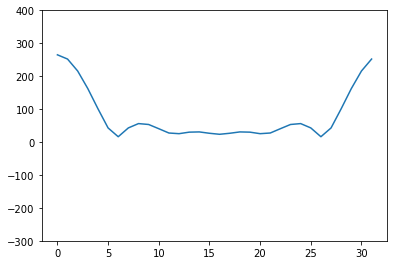

average fourier value:  50.48043012687584 max_four:  265.0724327685318


<Figure size 432x288 with 0 Axes>

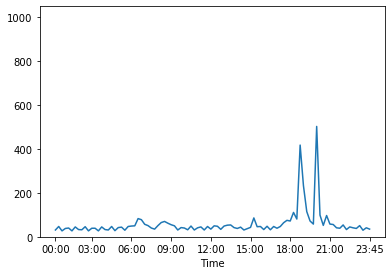

Mi 30.01.19 hour 9


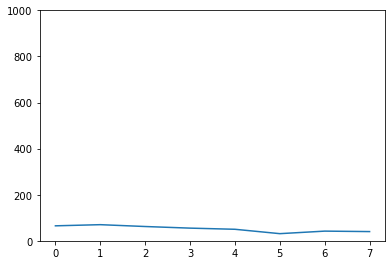

data:  348
average data value:  33.307646537694204


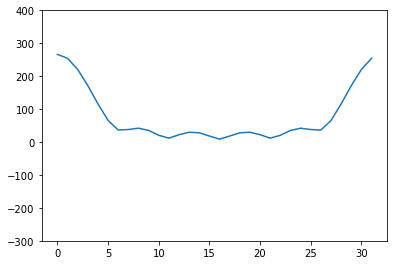

average fourier value:  48.95206290754797 max_four:  266.46117230155363
Mi 30.01.19 hour 10


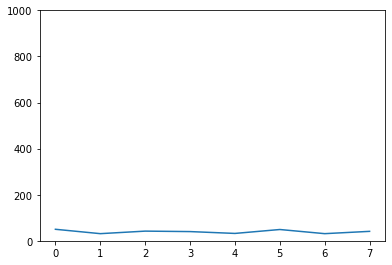

data:  349
average data value:  25.11226861908072


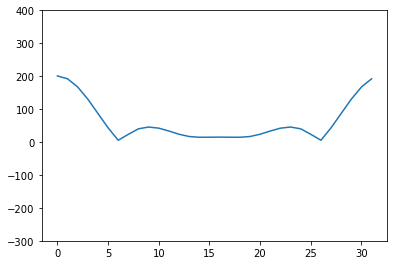

average fourier value:  40.079508814311346 max_four:  200.89814895264576
Mi 30.01.19 hour 11


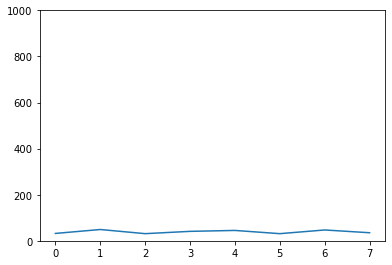

data:  350
average data value:  25.83512560373789


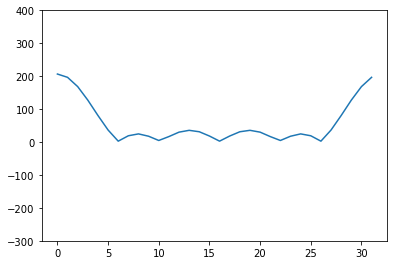

average fourier value:  34.29620438198715 max_four:  206.68100482990312
Mi 30.01.19 hour 12


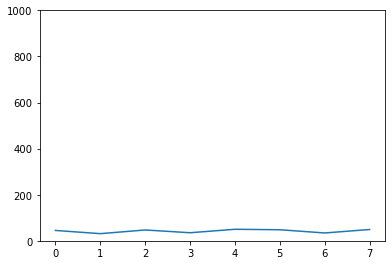

data:  351
average data value:  27.466491294197528


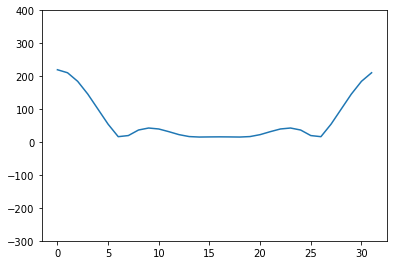

average fourier value:  42.81616758961521 max_four:  219.73193035358022
Mi 30.01.19 hour 13


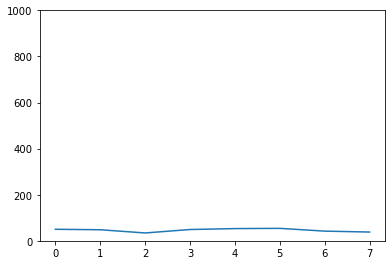

data:  352
average data value:  30.62668025350427


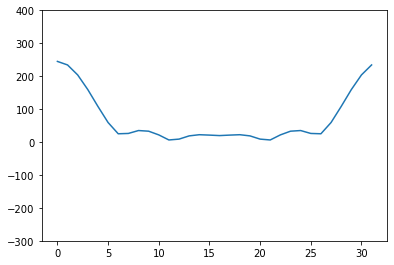

average fourier value:  41.95779334696094 max_four:  245.01344202803415
Mi 30.01.19 hour 14


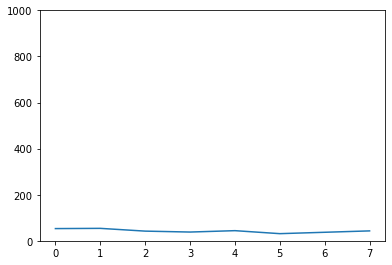

data:  353
average data value:  26.32808781187654


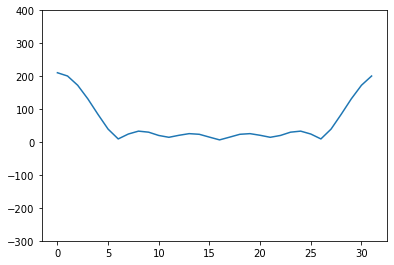

average fourier value:  36.248924390224076 max_four:  210.62470249501231
Mi 30.01.19 hour 15


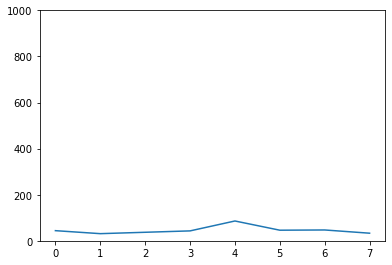

data:  354
average data value:  32.459789553037034


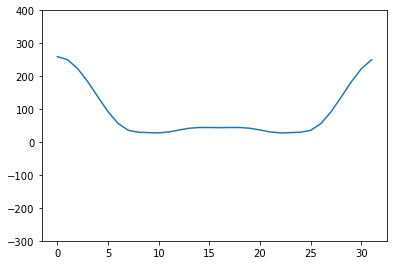

average fourier value:  60.62280639875358 max_four:  259.67831642429627
Mi 30.01.19 hour 16


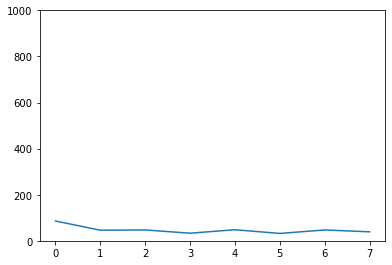

data:  355
average data value:  27.10590292862108


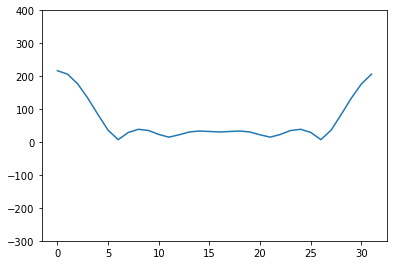

average fourier value:  39.98067847708507 max_four:  216.84722342896862
Mi 30.01.19 hour 17


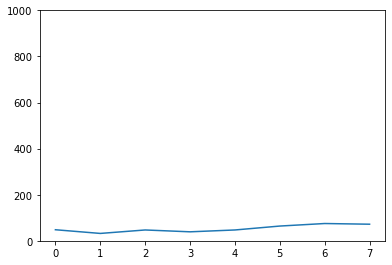

data:  356
average data value:  32.800608745832854


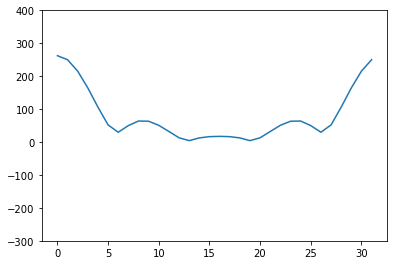

average fourier value:  50.68774486096569 max_four:  262.4048699666629
Mi 30.01.19 hour 18


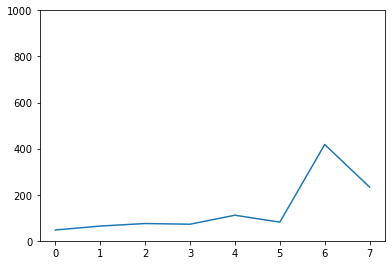

data:  357
average data value:  79.20344313543399


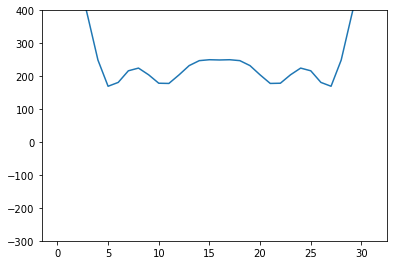

average fourier value:  224.40435868979404 max_four:  633.6275450834719
Mi 30.01.19 hour 19


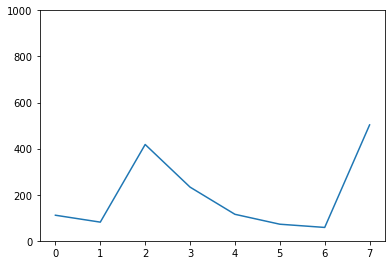

data:  358
average data value:  115.37065061374548


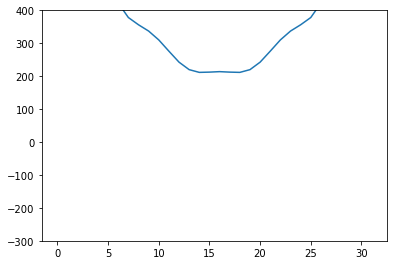

average fourier value:  369.32748967640265 max_four:  922.9652049099639
Mi 30.01.19 hour 20


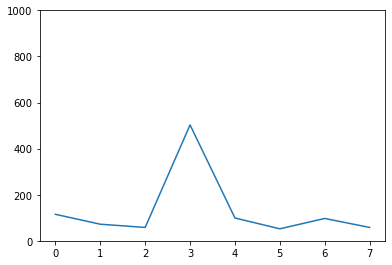

data:  359
average data value:  101.91287736491357


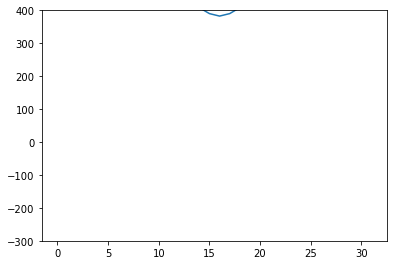

average fourier value:  457.71990300922465 max_four:  815.3030189193086


<Figure size 432x288 with 0 Axes>

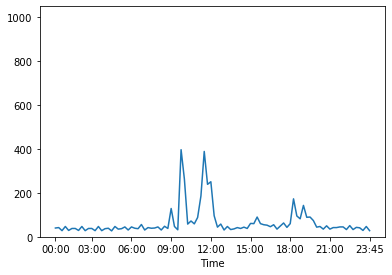

Do 31.01.19 hour 9


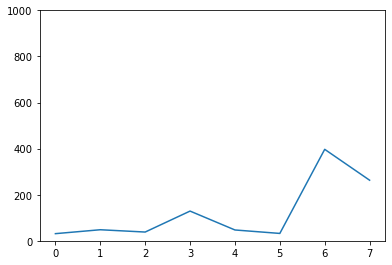

data:  360
average data value:  64.75136347566001


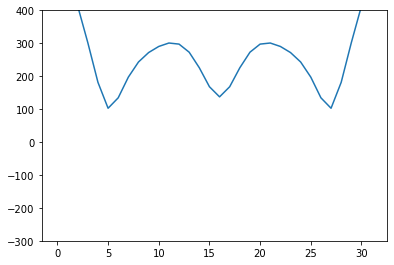

average fourier value:  229.9210809385381 max_four:  518.0109078052801
Do 31.01.19 hour 10


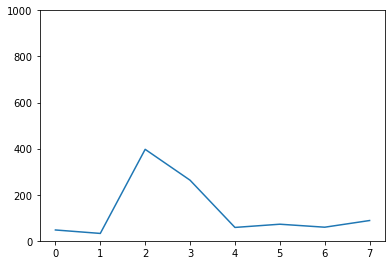

data:  361
average data value:  105.70308781187654


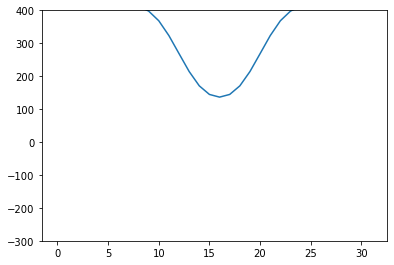

average fourier value:  379.106586771061 max_four:  845.6247024950123
Do 31.01.19 hour 11


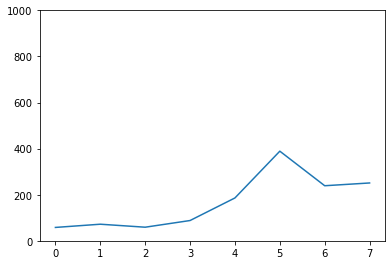

data:  362
average data value:  114.01275065377587


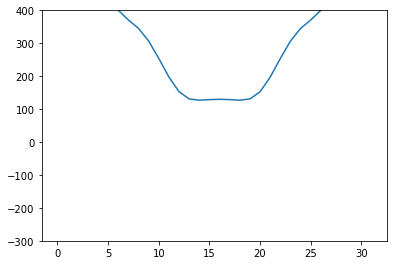

average fourier value:  317.0348624673312 max_four:  912.1020052302069
Do 31.01.19 hour 12


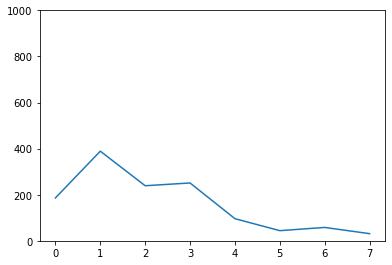

data:  363
average data value:  112.90417859240453


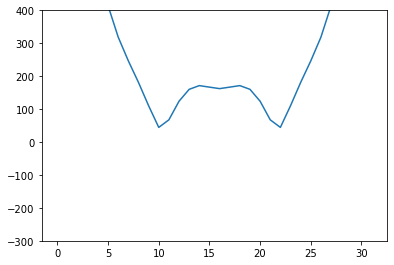

average fourier value:  246.9319834605709 max_four:  903.2334287392363
Do 31.01.19 hour 13


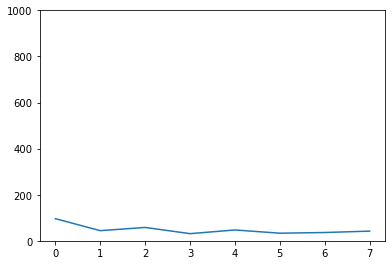

data:  364
average data value:  27.23760466978157


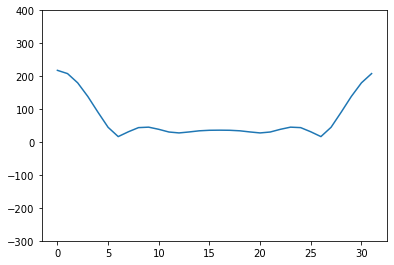

average fourier value:  46.82705725216876 max_four:  217.90083735825257
Do 31.01.19 hour 14


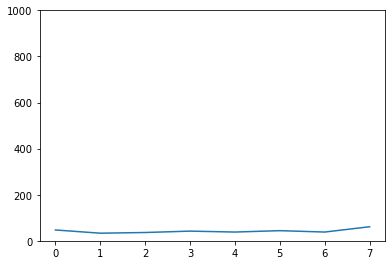

data:  365
average data value:  25.42493664443115


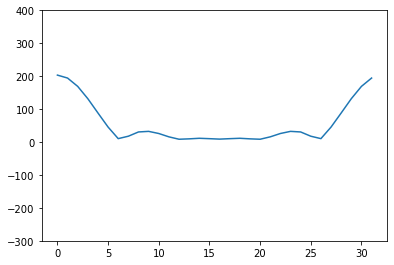

average fourier value:  33.76422870509766 max_four:  203.3994931554492
Do 31.01.19 hour 15


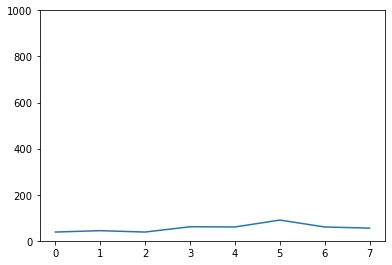

data:  366
average data value:  39.071386070716045


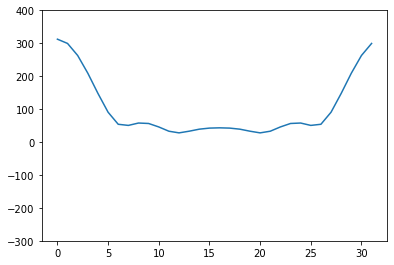

average fourier value:  68.28752884755657 max_four:  312.57108856572836
Do 31.01.19 hour 16


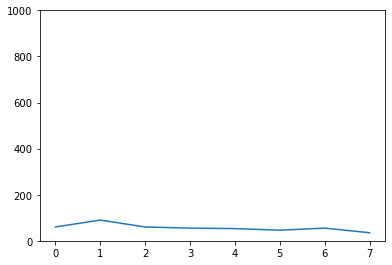

data:  367
average data value:  37.8290959639791


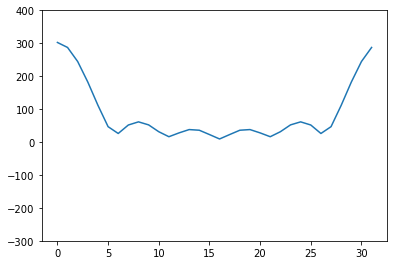

average fourier value:  54.17159392121235 max_four:  302.6327677118328
Do 31.01.19 hour 17


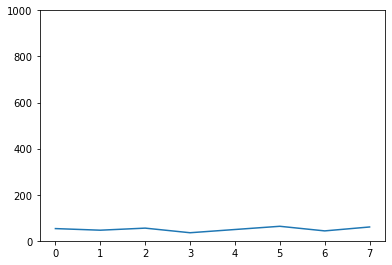

data:  368
average data value:  32.050272695132


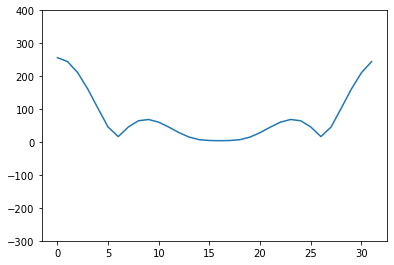

average fourier value:  51.21824492793454 max_four:  256.402181561056
Do 31.01.19 hour 18


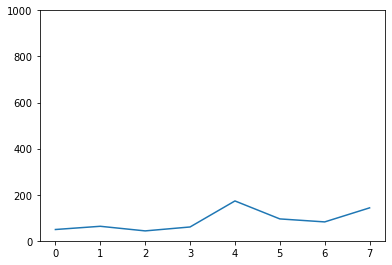

data:  369
average data value:  57.45409596397911


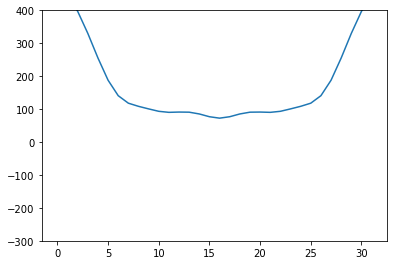

average fourier value:  136.12733784112723 max_four:  459.6327677118328
Do 31.01.19 hour 19


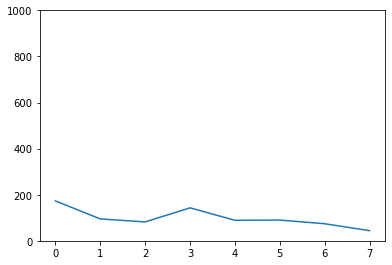

data:  370
average data value:  63.41287736491357


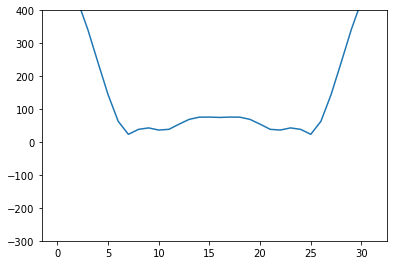

average fourier value:  95.82917161741383 max_four:  507.30301891930856
Do 31.01.19 hour 20


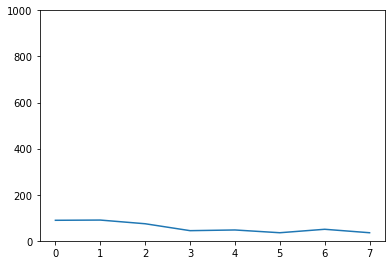

data:  371
average data value:  35.69705817211776


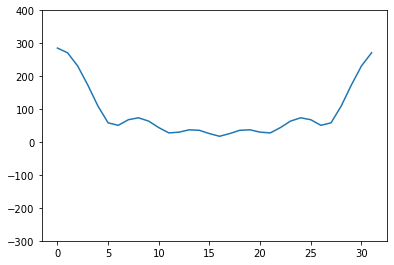

average fourier value:  61.33694704097357 max_four:  285.576465376942


<Figure size 432x288 with 0 Axes>

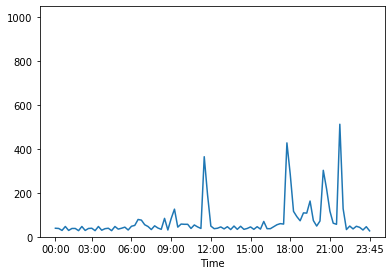

Fr 01.02.19 hour 9


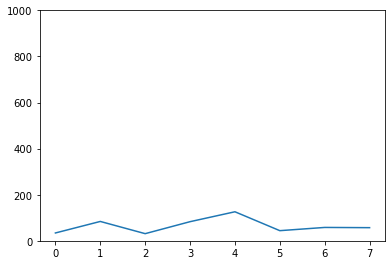

data:  372
average data value:  46.34987328886229


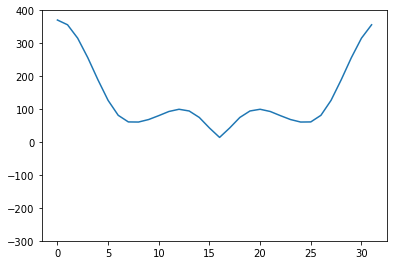

average fourier value:  102.18702736837794 max_four:  370.7989863108984
Fr 01.02.19 hour 10


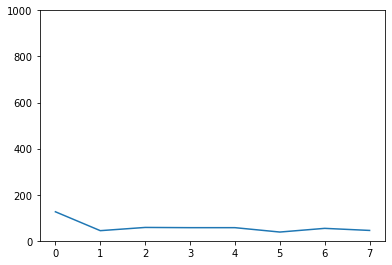

data:  373
average data value:  33.73794072048243


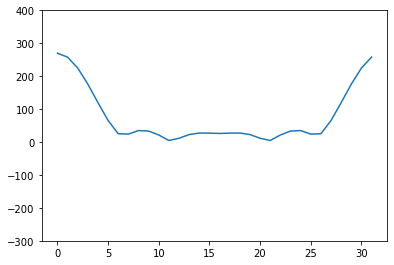

average fourier value:  45.73015434196918 max_four:  269.9035257638594
Fr 01.02.19 hour 11


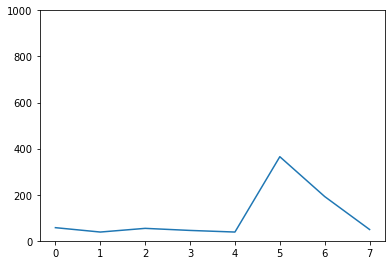

data:  374
average data value:  80.32373842562203


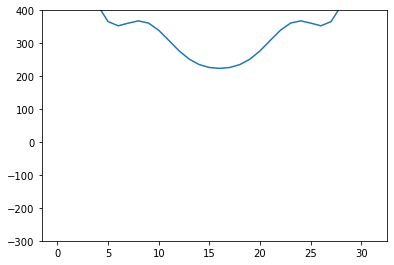

average fourier value:  334.8316187720872 max_four:  642.5899074049762
Fr 01.02.19 hour 12


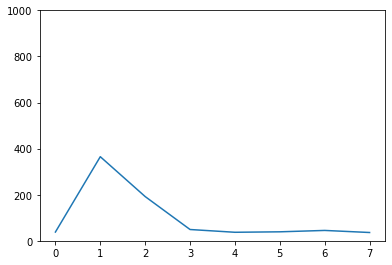

data:  375
average data value:  70.95209893263056


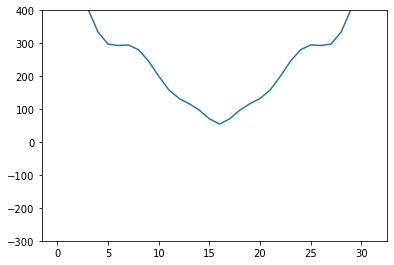

average fourier value:  225.20444634662525 max_four:  567.6167914610445
Fr 01.02.19 hour 13


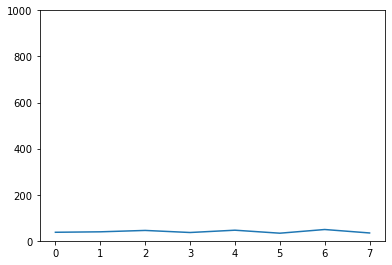

data:  376
average data value:  26.723865136759734


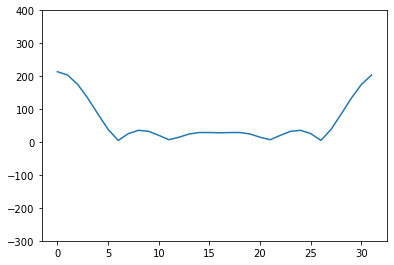

average fourier value:  36.95281858263567 max_four:  213.79092109407787
Fr 01.02.19 hour 14


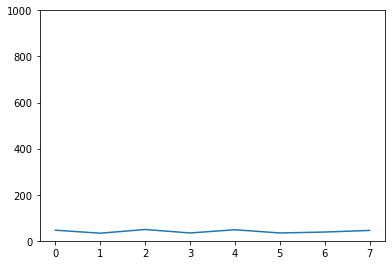

data:  377
average data value:  26.04993664443115


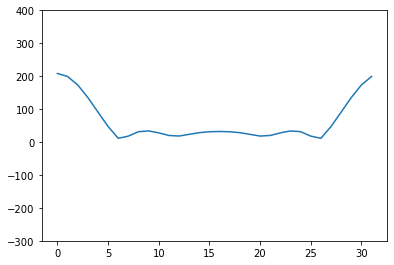

average fourier value:  39.85039109469967 max_four:  208.3994931554492
Fr 01.02.19 hour 15


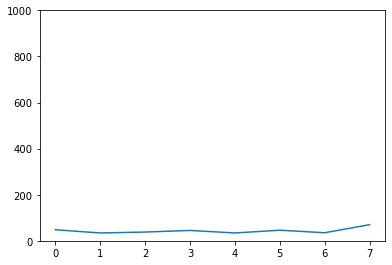

data:  378
average data value:  25.64712152768661


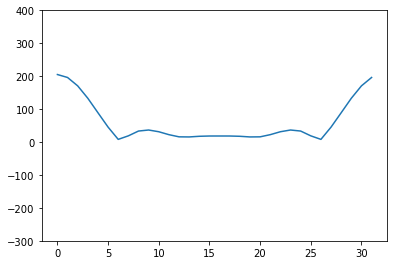

average fourier value:  37.364077341233255 max_four:  205.17697222149286
Fr 01.02.19 hour 16


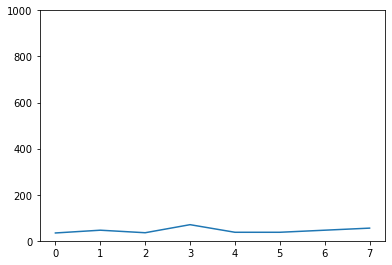

data:  379
average data value:  29.40449537024881


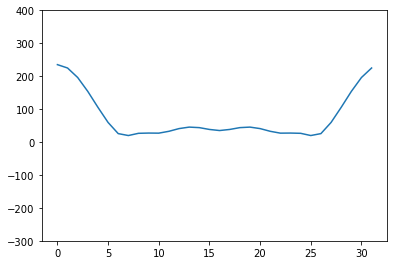

average fourier value:  49.7157494899302 max_four:  235.23596296199048
Fr 01.02.19 hour 17


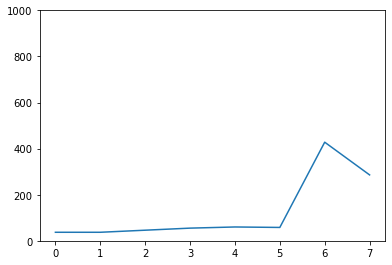

data:  380
average data value:  62.90451464310541


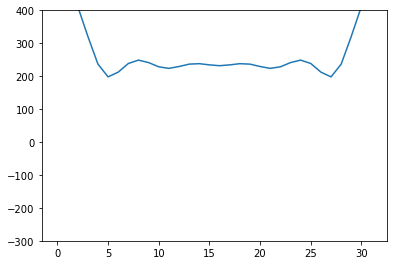

average fourier value:  237.6255608945413 max_four:  503.23611714484326
Fr 01.02.19 hour 18


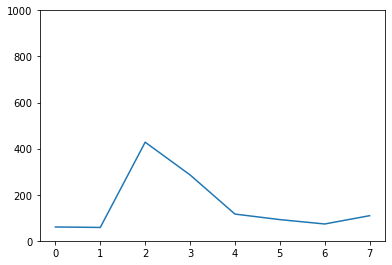

data:  381
average data value:  125.25939014676733


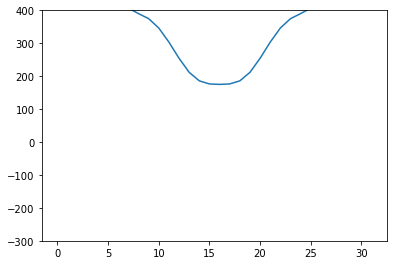

average fourier value:  389.98850464766593 max_four:  1002.0751211741386
Fr 01.02.19 hour 19


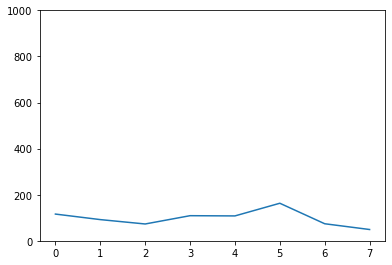

data:  382
average data value:  69.30865468979677


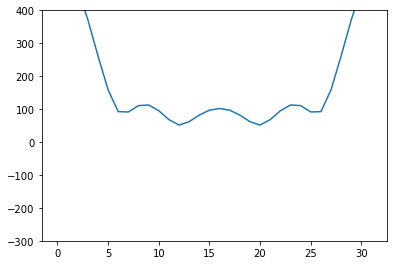

average fourier value:  127.40308027825992 max_four:  554.4692375183741
Fr 01.02.19 hour 20


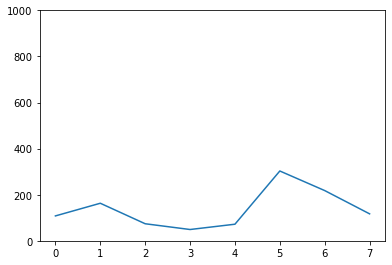

data:  383
average data value:  91.36127973983474


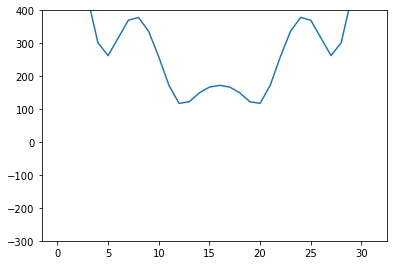

average fourier value:  260.76457232009164 max_four:  730.8902379186779


<Figure size 432x288 with 0 Axes>

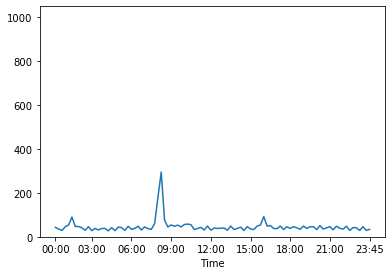

Sa 02.02.19 hour 9


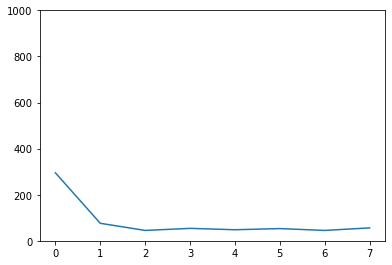

data:  384
average data value:  34.24531456304463


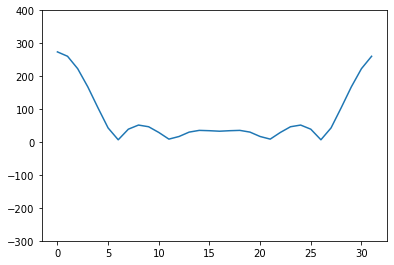

average fourier value:  47.24781544306848 max_four:  273.96251650435704
Sa 02.02.19 hour 10


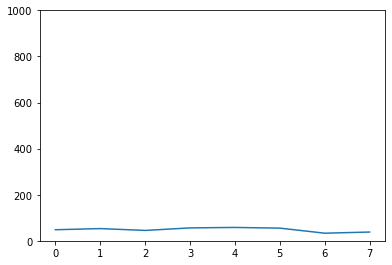

data:  385
average data value:  33.32105002001519


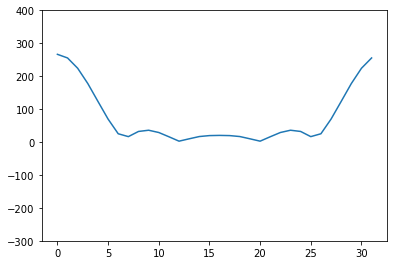

average fourier value:  44.22665358507274 max_four:  266.56840016012154
Sa 02.02.19 hour 11


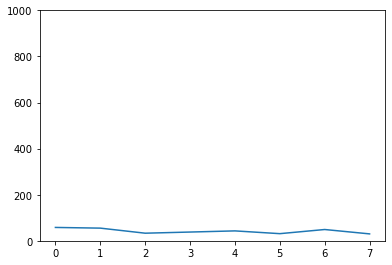

data:  386
average data value:  26.071386070716045


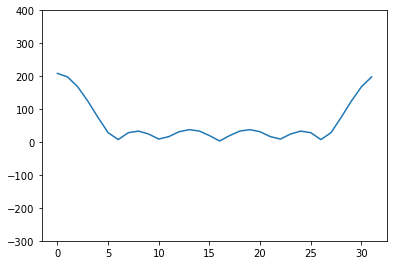

average fourier value:  36.12256529699154 max_four:  208.57108856572836
Sa 02.02.19 hour 12


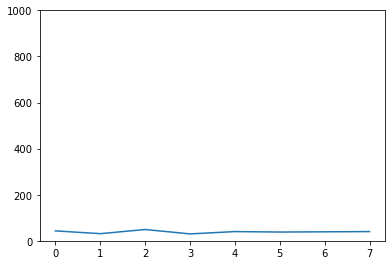

data:  387
average data value:  24.973529086058875


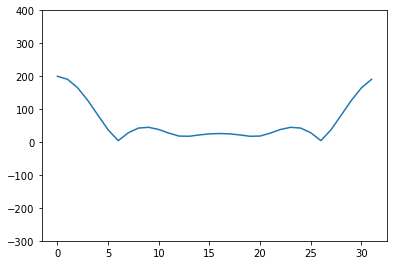

average fourier value:  39.442523288947896 max_four:  199.788232688471
Sa 02.02.19 hour 13


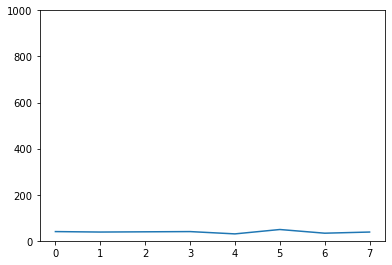

data:  388
average data value:  25.174936644431146


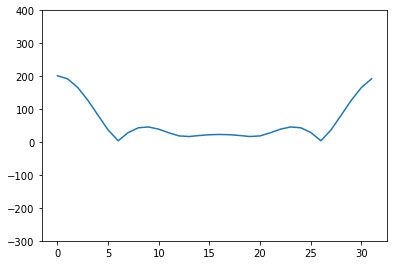

average fourier value:  39.45728103342374 max_four:  201.39949315544916
Sa 02.02.19 hour 14


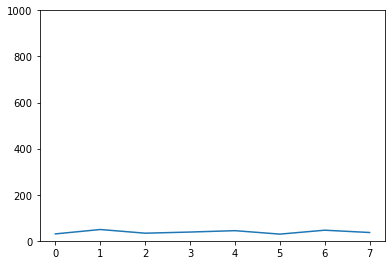

data:  389
average data value:  25.25871804536562


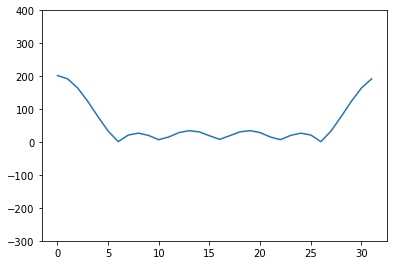

average fourier value:  33.8885523459245 max_four:  202.06974436292495
Sa 02.02.19 hour 15


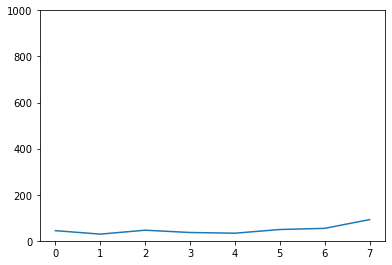

data:  390
average data value:  26.841827344898384


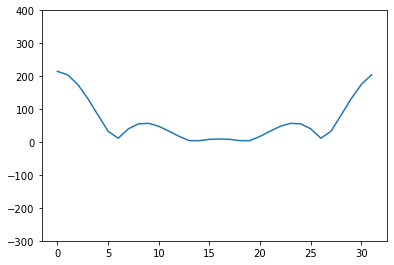

average fourier value:  40.54939761285995 max_four:  214.73461875918707
Sa 02.02.19 hour 16


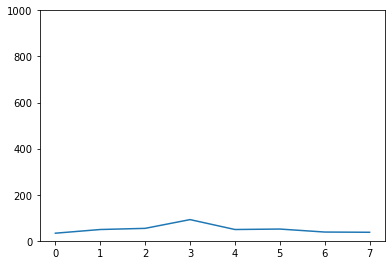

data:  391
average data value:  37.39745757838746


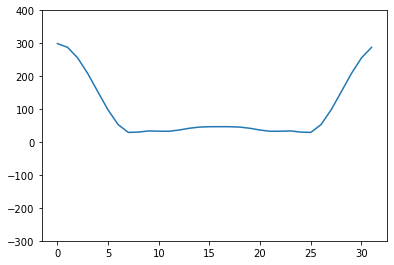

average fourier value:  64.60399278853423 max_four:  299.1796606270997
Sa 02.02.19 hour 17


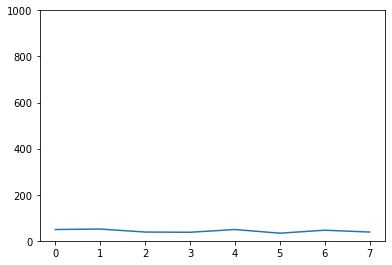

data:  392
average data value:  27.036533162110157


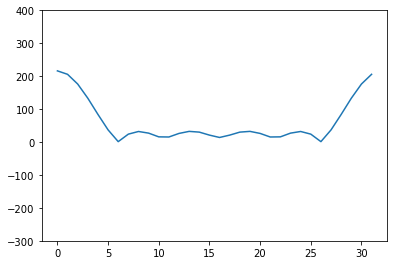

average fourier value:  36.917977401508416 max_four:  216.29226529688128
Sa 02.02.19 hour 18


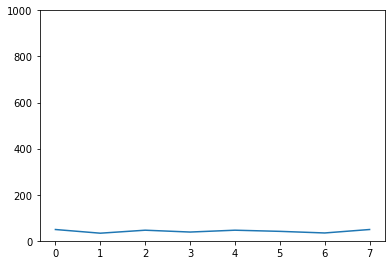

data:  393
average data value:  26.49430641094207


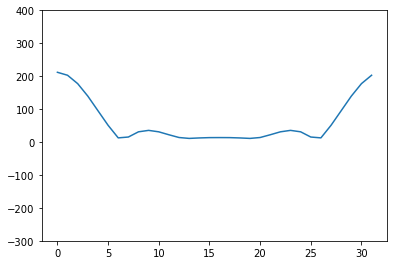

average fourier value:  37.26965756629918 max_four:  211.95445128753656
Sa 02.02.19 hour 19


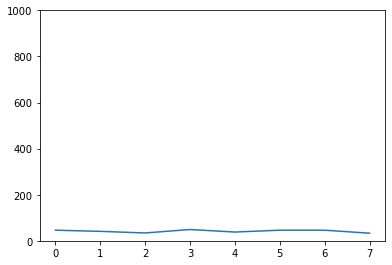

data:  394
average data value:  27.52245757838746


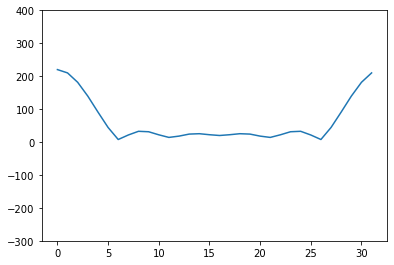

average fourier value:  38.02810131954944 max_four:  220.17966062709968
Sa 02.02.19 hour 20


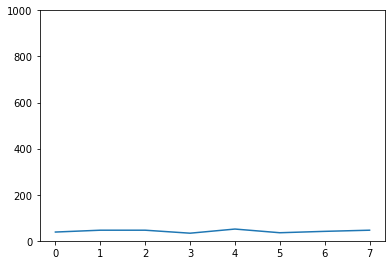

data:  395
average data value:  27.272457578387463


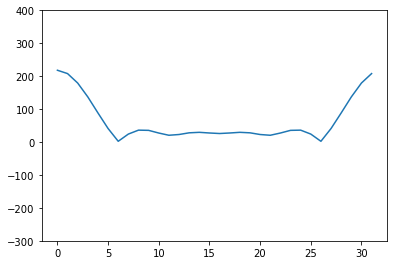

average fourier value:  40.0958099826307 max_four:  218.17966062709968


<Figure size 432x288 with 0 Axes>

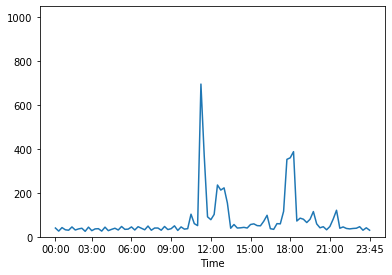

So 03.02.19 hour 9


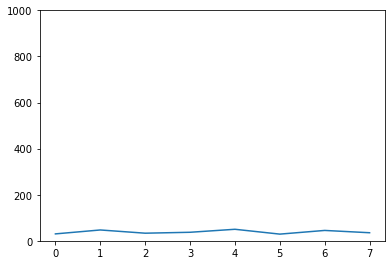

data:  396
average data value:  25.65449537024881


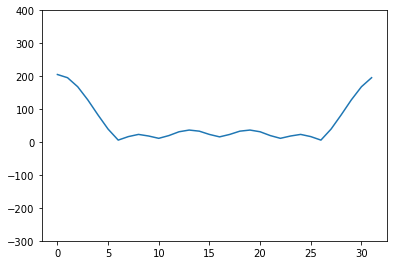

average fourier value:  36.091185648946684 max_four:  205.23596296199048
So 03.02.19 hour 10


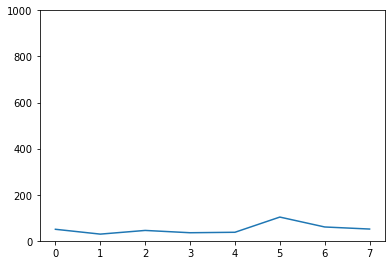

data:  397
average data value:  34.300272695132


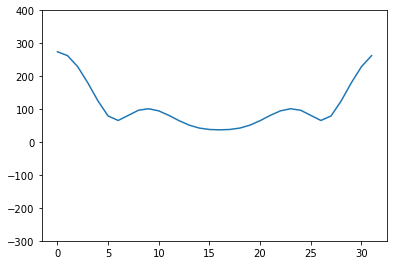

average fourier value:  84.75194428264597 max_four:  274.402181561056
So 03.02.19 hour 11


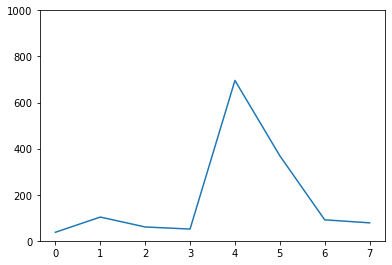

data:  398
average data value:  161.82306632422032


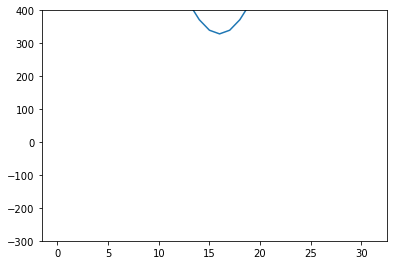

average fourier value:  656.2693329743227 max_four:  1294.5845305937626
So 03.02.19 hour 12


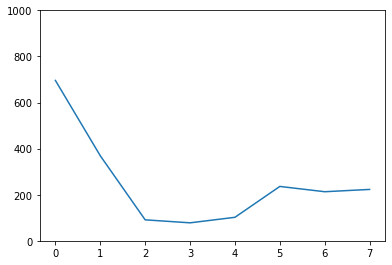

data:  399
average data value:  107.84419897266096


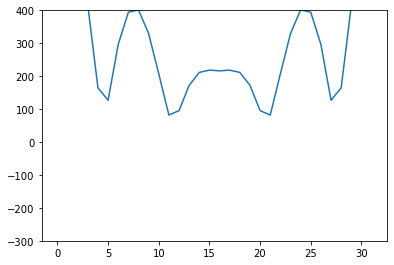

average fourier value:  239.74974756731126 max_four:  862.7535917812877
So 03.02.19 hour 13


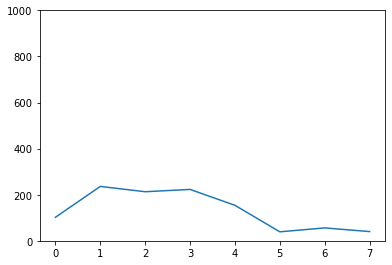

data:  400
average data value:  100.93600704470273


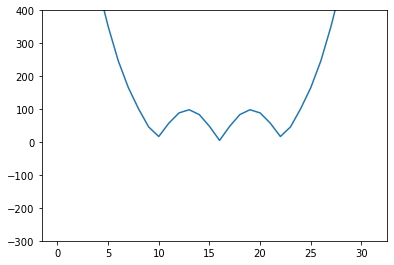

average fourier value:  182.95420257751078 max_four:  807.4880563576219
So 03.02.19 hour 14


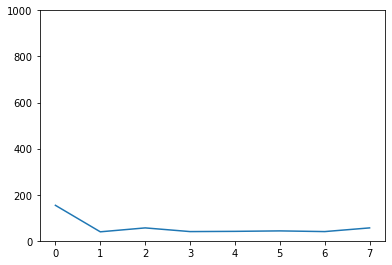

data:  401
average data value:  28.536197111409304


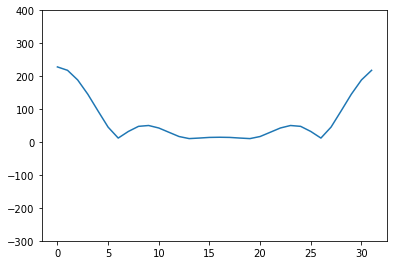

average fourier value:  42.622345679560496 max_four:  228.28957689127444
So 03.02.19 hour 15


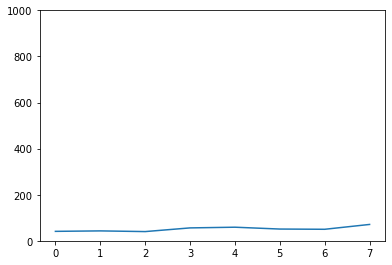

data:  402
average data value:  32.855902928621084


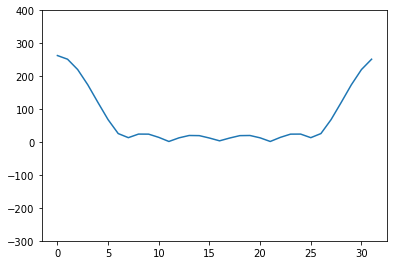

average fourier value:  40.78940343119147 max_four:  262.8472234289686
So 03.02.19 hour 16


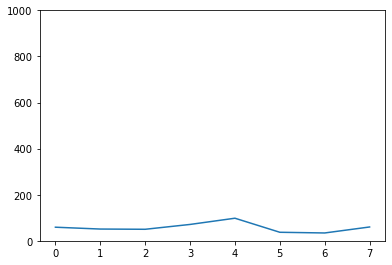

data:  403
average data value:  38.494642461642925


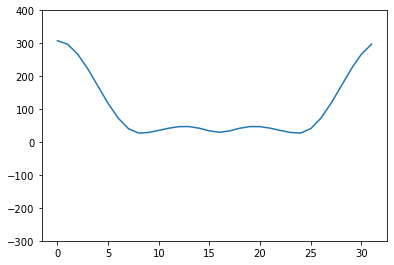

average fourier value:  71.33368931386931 max_four:  307.9571396931434
So 03.02.19 hour 17


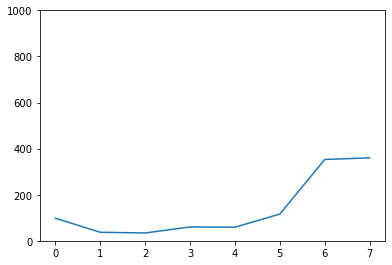

data:  404
average data value:  63.42394776518518


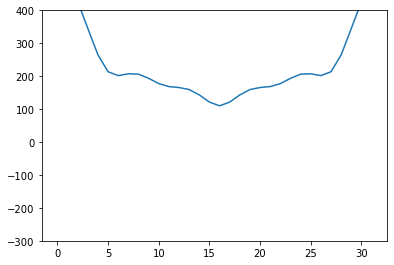

average fourier value:  197.63751460228107 max_four:  507.39158212148146
So 03.02.19 hour 18


KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [29]:
listDataframe = []
i = 240
for line in range(20,totalLine):
    plt.clf()
    date = dataframe.iloc[line,1]
    day = dataframe.iloc[line,2]
    
    data = get_data_from_table_1(line, offsetCol, timestampPerDay, dataframe)
    plot_full_figure(data)
    
    for time in range(8,20):
        time_data = data[time*4:time*4 + 8] #get data in 2 hours
        print(date, "hour" ,time + 1)
        plot_figure(time_data)
        avg_data = average_data(time_data)
        print("data: ", i)
        print("average data value: ", avg_data)
        plot_fft(time_data)
        avg_four, max_four = average_four(time_data)
        print("average fourier value: ",avg_four, "max_four: ", max_four)
        row = [avg_data, avg_four, max_four]
        listDataframe.append(row)
        i  = i + 1
        
        #list_data.append(add_data(time_data))
        #list_four.append(add_four(time_data))
    
#df = pd.DataFrame(listDataframe) 
#df.to_csv("9_20_hour_classification_custom_window.csv")